<img src="images/banner.png" style="display:block; margin-left:auto; margin-right:auto;"/>

### Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

### Existing Challenges

Some of the major challenges faced by new or growing e-commerce platforms include:

1. High competition from leading platforms equipped with AI-powered recommendation systems.
2. Lack of personalized user experiences leading to poor engagement and higher bounce rates.
3. Difficulty in analyzing customer behavior from raw clickstream and purchase data.
4. Limited ability to process large or unstructured datasets for accurate recommendations.
5. Absence of scalable and automated ML pipelines that improve with user activity.
6. Low customer retention due to generic product listings.

### Project Goals

The main objectives of this project are:

1. To design and build a reliable and scalable machine learning-based **product recommendation system** for e-commerce platforms.
2. To analyze user interaction data and derive meaningful insights that support **personalized product discovery**.
3. To improve user engagement, reduce bounce rate, and enhance product visibility through **relevant, data-driven suggestions**.
4. To explore and compare multiple recommendation techniques such as **Collaborative Filtering and Content-Based Filtering**.
5. To analyze **User-based recommendation system** & **Item-based recommendation system** and select the one that is best suited in this case. 
6. To develop a system that can be potentially **integrated into real-world e-commerce applications**.
7. To lay foundational work for **advanced intelligent e-commerce personalization systems**.

### Project Overview

The objective of this project is to design and implement a **data-driven product recommendation system** using real e-commerce data to enhance customer engagement, increase product visibility, and improve conversion rates.

The workflow includes:

- Data preprocessing and feature engineering
- Exploratory data analysis (EDA)
- Model development using appropriate recommendation techniques
- Evaluation and performance measurement
- Implementation of a deployable recommendation framework

The final system empowers users to discover relevant and personalized product suggestions, enhancing their overall shopping experience.

### End to End workflow

<img src="images/workflow.png" style="display:block; margin-left:auto; margin-right:auto; width:500px; height:500px;" />

### Key features

This project and the recommendation system aim to include the following features:

- **Data-Driven Recommendation Engine:** Utilizes real dataset insights to generate meaningful product suggestions.
- **Personalized User Experience:** Suggestions tailored to user preferences, browsing history, or similar user profiles.
- **Multiple Recommendation Techniques:** Support for Collaborative Filtering, Content-Based models, or hybrid approaches.
- **Scalable ML Pipeline:** Framework that can be extended or integrated into live platforms.
- **Exploratory Insights Visualization:** Charts and summaries that explain data behavior, product demand, and category popularity.
- **Reusable & Modular Code Design:** Ensures the model can be improved, retrained, or replaced easily.
- **Deployment-Ready Prototype:** Can be converted into API endpoints or integrated into UI/UX systems.

### Origianl Source Dataset

https://www.kaggle.com/datasets/datafiniti/grammar-and-online-product-reviews

**Note:**: For this case study considered the datasets given by Upgrad

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting max rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [3]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
#Modelling
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import pairwise_distances

### Loading the data

In [7]:
# importing dataset
df_reviews = pd.read_csv("data/sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


## Here are the attribute descriptions

In [9]:
df_reviews_attributes = pd.read_csv("data/Data+Attribute+Description.csv", encoding='latin')
df_reviews_attributes

,Attribute,Attribute Description
0,id,Uniques identity number to identify each unique review given by the user to a particular product in the dataset
1,brand,Name of the brand of the product to which user has given review and rating
2,categories,"Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more."
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added review or rating
5,reviews_date,Date on which the review has been added by the user
6,reviews_didPurchase,Whether a particular user has purchased the product or not
7,reviews_doRecommend,Whether a particular user has recommended the product or not
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


### Exploratory Data Analysis

In [11]:
df_reviews.shape

(30000, 15)

**There are total of 30,000 reviews present in the given dataset**

In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [14]:
df_reviews['reviews_username'].nunique()

24914

**There are total of 24,914 unique users who has given reviews in the given dataset**

In [16]:
df_reviews['name'].nunique()

271

**There are total of 271 products for which users given the reviews in the given dataset**

#### Data Cleaning

**Handle Missing Values**

In [20]:
#Null value analysis
df_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

- The null-value assessment indicates that the missing data occurs only in fields that are not directly pertinent to the sentiment analysis, with the sole exception of one absent value in the user_sentiment column.
- This missing sentiment annotation can be reliably inferred from the corresponding reviews_rating, thereby preserving dataset completeness for subsequent model development.

In [22]:
def summarize_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a summary of missing values for all columns in a DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame to analyze.
        
    Returns
    -------
    pd.DataFrame
        A DataFrame containing the count and percentage of missing values
        for each column that has at least one missing entry.
    """

    # Identify columns with missing values
    cols_with_missing = df.columns[df.isna().any()]

    # Count of missing values
    missing_count = df[cols_with_missing].isna().sum().sort_values(ascending=False)

    # Percentage of missing values
    missing_percentage = (
        (missing_count / len(df)) * 100
    ).round(2)

    # Combine results into a single DataFrame
    missing_summary = pd.concat(
        [missing_count, missing_percentage],
        axis=1,
        keys=['Missing_Count', 'Missing_Percentage']
    )

    return missing_summary


In [23]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews)
df_missing_val_summary

,Missing_Count,Missing_Percentage
reviews_userProvince,29830,99.43
reviews_userCity,28071,93.57
reviews_didPurchase,14068,46.89
reviews_doRecommend,2570,8.57
reviews_title,190,0.63
manufacturer,141,0.47
reviews_username,63,0.21
reviews_date,46,0.15
user_sentiment,1,0.00


### **Observations & Insights on Missing Data**

#### **1. Location-related fields have extremely high missingness**
- **`reviews_userProvince` (99.43%)** and **`reviews_userCity` (93.57%)** are missing for nearly all records.  
- These fields are unlikely to add analytical value and are poor candidates for modeling without removal or heavy imputation.

**Implication:**  
These columns can be safely dropped unless geographic segmentation is specifically required.

---

#### **2. Purchase-related information is moderately missing**
- **`reviews_didPurchase`** has **46.89%** missing data — nearly half of the dataset.  
- This suggests that many reviewers do not specify whether they purchased the product.

**Implication:**  
The feature could still be useful, but missingness should be handled carefully (e.g., treat missing as a separate category).

---

#### **3. Recommendation indicator is mostly complete**
- **`reviews_doRecommend`** shows **8.57%** missing values.

**Implication:**  
This column remains reliable for analysis or modeling with minimal imputation required.

---

#### **4. Review content fields have very low missingness**
- **`reviews_title`** (0.63%)  
- **`manufacturer`** (0.47%)  
- **`reviews_username`** (0.21%)  
- **`reviews_date`** (0.15%)

**Implication:**  
These fields are generally complete and safe to include in further analysis.

---

#### **5. Sentiment label is effectively complete**
- **`user_sentiment`** has only **1 missing value** (0.00%).

**Implication:**  
This ensures strong dataset integrity for sentiment analysis; the single missing value can be easily imputed.

---

### **Overall Summary**
- Critical fields required for sentiment analysis and modeling are highly complete.  
- Location fields have extremely high missingness and offer limited analytical value.  
- Purchase-related missingness may hold behavioral insights and should be treated thoughtfully.  
- Overall, the dataset is well-suited for further analysis after minor preprocessing.


In [25]:
df_reviews_clean = df_reviews.copy()

In [26]:
df_reviews_clean.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace=True)

**Checking reviews_doRecommend column**

In [28]:
df_reviews_clean.reviews_doRecommend.value_counts(normalize=True)

reviews_doRecommend
True     0.94
False    0.06
Name: proportion, dtype: float64

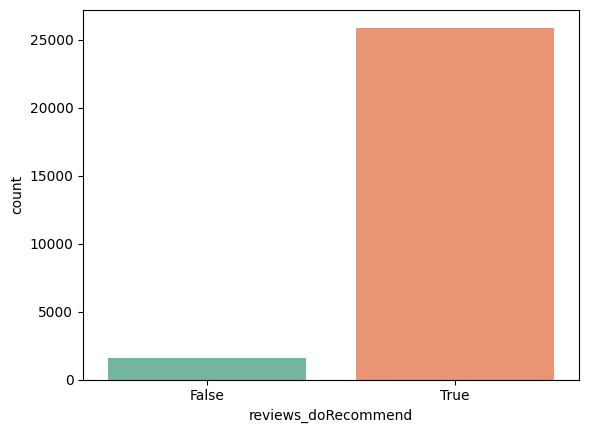

In [29]:
sns.countplot(x='reviews_doRecommend', data=df_reviews_clean, palette='Set2')
plt.show()

The `reviews_doRecommend` column is highly imbalanced, with approximately **94%** of entries marked as `True` and only **6%** marked as `False`. This extreme skew indicates that the feature carries very limited discriminatory power—there is insufficient variability for a model to learn any meaningful patterns from it. 

**Given its lack of predictive value and strong imbalance, this column will be dropped from further analysis and model training.**


In [31]:
df_reviews_clean.drop(columns=['reviews_doRecommend'], inplace=True)

**Let's check the latest missing value summary**

In [33]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews_clean)
df_missing_val_summary

,Missing_Count,Missing_Percentage
reviews_title,190,0.63
manufacturer,141,0.47
reviews_username,63,0.21
reviews_date,46,0.15
user_sentiment,1,0.00


**Handling NULL values in reviews_title**

The `reviews_title` column is a valuable feature for our analysis, as it contains the user-provided titles summarizing their product reviews. Since the proportion of missing values is extremely low (only **0.63%**), removing these rows will have a negligible impact on the dataset. Therefore, we will drop the records with missing `reviews_title` entries to maintain overall data quality and consistency.

In [36]:
df_reviews_clean = df_reviews_clean[~ df_reviews_clean.reviews_title.isna() ]

**Let's check the latest missing value summary**

In [38]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews_clean)
df_missing_val_summary

,Missing_Count,Missing_Percentage
manufacturer,141,0.47
reviews_username,62,0.21
reviews_date,46,0.15
user_sentiment,1,0.00


**Handling NULL values in reviews_username**

The `reviews_username` attribute serves as a unique user identifier and is therefore essential for ensuring accurate user-level tracking and analysis. Given that the percentage of missing values is exceptionally low (**0.21%**), the removal of these records will not compromise the representativeness of the dataset. Consequently, the affected rows will be excluded to preserve analytical rigor.

In [41]:
df_reviews_clean = df_reviews_clean[~ df_reviews_clean.reviews_username.isna() ]

In [42]:
# Checking rowcount post deletion
df_reviews_clean.shape

(29748, 11)

### Handling NULL values in user_sentiment

In [44]:
df_reviews_clean['user_sentiment'].value_counts()

user_sentiment
Positive    26412
Negative     3335
Name: count, dtype: int64

In [45]:
df_reviews_clean[ df_reviews_clean.user_sentiment.isna() ]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,5,my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the poin...,a super hit with my children. they loved it!!??,7.87E+11,NaN


- Given that the `user_sentiment` column contains only one missing entry, the record was examined manually to determine the appropriate label. 
- The corresponding review title and rating indicate a favorable user experience.
- Accordingly, the missing sentiment value will be imputed as **“Positive”**, ensuring a fully labeled dataset for subsequent analysis.

**Update missing sentiment with the ratings**

In [48]:
# Define function to map ratings to sentiment
def infer_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'neutral'  

# Fill missing user_sentiment using reviews_rating
df_reviews_clean['user_sentiment'].fillna(df_reviews_clean['reviews_rating'].map(infer_sentiment), inplace=True)

In [49]:
# Verify missing value in user-sentiment column

df_reviews_clean['user_sentiment'].isnull().sum()

0

**Let's check the latest missing value summary**

In [51]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews_clean)
df_missing_val_summary

,Missing_Count,Missing_Percentage
manufacturer,141,0.47
reviews_date,40,0.13


- As neither `manufacturer` nor `reviews_date` serves a functional role in the development of the Sentiment Analysis or Recommender models, it's not required to address their missing values.
- These attributes will be omitted from further processing, ensuring that resources are focused solely on features relevant to model construction.

In [53]:
df_reviews_clean.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


### Data Analysis

**Checking Distribution of reviews_rating column**

In [56]:
# Analyze the rating column

df_reviews_clean["reviews_rating"].value_counts()

reviews_rating
5    20654
4     5992
1     1361
3     1332
2      409
Name: count, dtype: int64

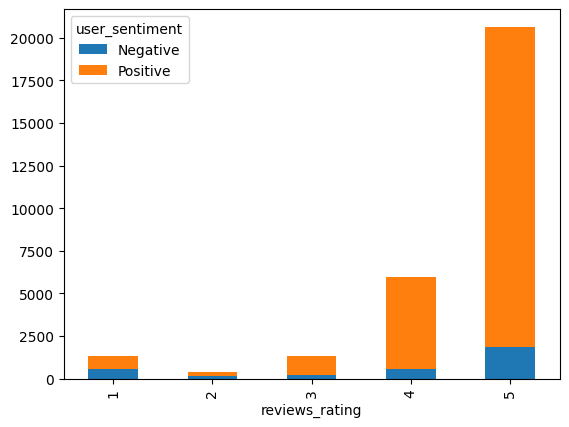

In [57]:
# Check sentiment distribution across ratings

df_reviews_clean.groupby(['reviews_rating', 'user_sentiment']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

The analysis of the `review_rating` vs `user_sentiment` distribution yields the following key insights:

- **Unexpected negative sentiments appear within ratings of 3, 4, and 5.**  
  This suggests potential mislabeling or cases where users assigned relatively high ratings yet expressed dissatisfaction in the review text. Such inconsistencies may arise from user behavior (e.g., rating leniency) or errors during the labeling process.

- **Positive sentiment labels are present in ratings of 1 and 2.**  
  These instances may reflect incorrect annotations, ambiguous review content, or the use of sarcasm or mixed sentiment in the text. They highlight the need to rely on textual content rather than ratings alone when determining sentiment.

Overall, these patterns indicate that **ratings are not always reliable proxies for sentiment**, reinforcing the value of text-based sentiment modeling.

**Checking Top 5 Brands with negative reviews**

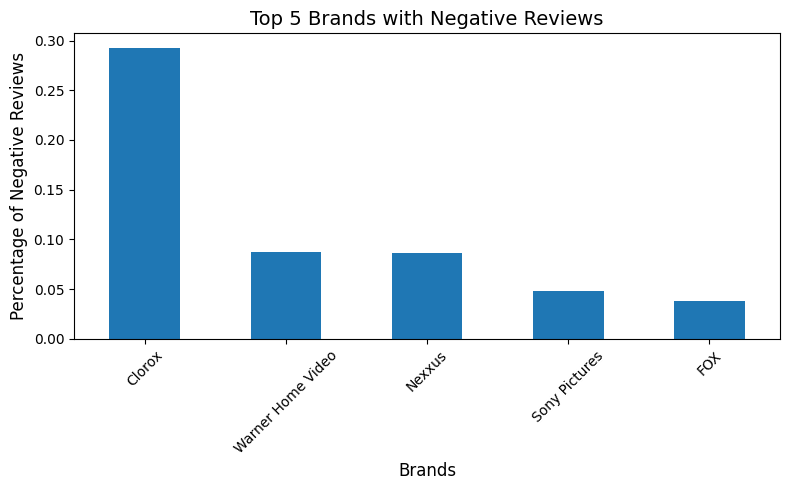

In [60]:
# Filter only negative reviews
negative_reviews = df_reviews_clean[df_reviews_clean['user_sentiment'] == 'Negative']

# Calculate top 5 brands with the highest percentage of negative reviews
top_negative_brands = (
    negative_reviews['brand']
        .value_counts(normalize=True, ascending=False)
        .head(5)
)

# Plot the results
plt.figure(figsize=(8, 5))
top_negative_brands.plot(kind='bar')

plt.title("Top 5 Brands with Negative Reviews", fontsize=14)
plt.xlabel("Brands", fontsize=12)
plt.ylabel("Percentage of Negative Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Inference from the Plot: Top 5 Brands with Negative Reviews**

The bar chart highlights the brands with the highest proportion of negative reviews. The insights are as follows:

- **Clorox stands out significantly**, with nearly **30%** of its reviews being negative. This is notably higher than all other brands and may indicate recurring product issues, quality concerns, or unmet customer expectations.

- **Warner Home Video** and **Nexxus** follow, each with roughly **9%** negative reviews. Although substantially lower than Clorox, these values still suggest noticeable areas where customer satisfaction may be lacking.

- **Sony Pictures** and **FOX** exhibit the lowest negative review percentages in the top 5, at around **5%** and **4%**, respectively. These figures suggest relatively better customer sentiment compared to the other brands in this group.

Overall, the distribution indicates that **Clorox is an outlier with a disproportionately high share of negative sentiment**, warranting deeper investigation into specific product categories or recurring complaint themes.


**Checking Top 5 Brands with positive reviews**

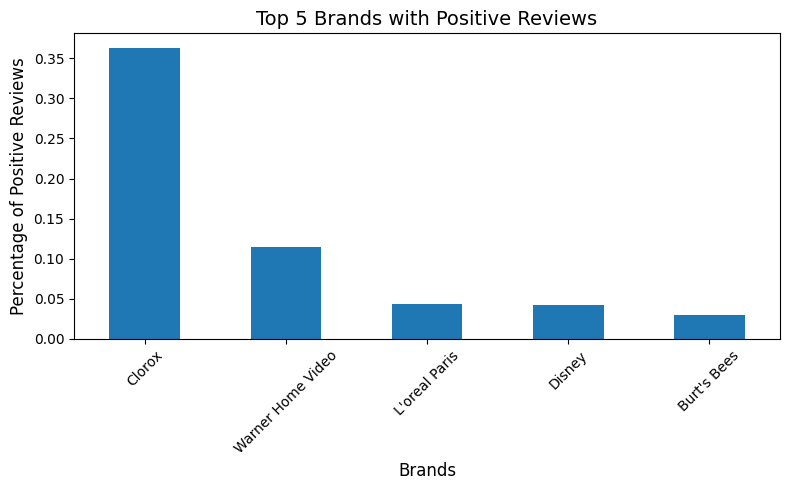

In [63]:
# Filter only positive reviews
positive_reviews = df_reviews_clean[df_reviews_clean['user_sentiment'] == 'Positive']

# Calculate the top 5 brands with the highest percentage of positive reviews
top_positive_brands = (
    positive_reviews['brand']
        .value_counts(normalize=True, ascending=False)
        .head(5)
)

# Plot the results
plt.figure(figsize=(8, 5))
top_positive_brands.plot(kind='bar')

plt.title("Top 5 Brands with Positive Reviews", fontsize=14)
plt.xlabel("Brands", fontsize=12)
plt.ylabel("Percentage of Positive Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Inference from the Plot: Top 5 Brands with Positive Reviews**

The bar chart highlights the brands with the highest proportion of positive sentiment among all product reviews. Key observations include:

- **Clorox dominates with the largest share of positive reviews**, accounting for approximately **36%** of all positive sentiment. This suggests strong customer satisfaction and consistent positive feedback across its products.

- **Warner Home Video** holds the second position with around **11%** positive reviews. While significantly lower than Clorox, it still represents a notable portion of positive sentiment within the dataset.

- **L’Oreal Paris**, **Disney**, and **Burt’s Bees** contribute smaller percentages, each ranging between **3–5%** of total positive reviews. These brands show generally favorable customer experiences but with a smaller review volume compared to the top two.

- The sharp drop from Clorox to the remaining brands indicates that **positive sentiment is heavily concentrated around a few key brands**, with Clorox being a clear outlier in customer approval.

Overall, the visualization suggests that **Clorox enjoys significantly higher positive customer sentiment** relative to other leading brands in this dataset.


In [65]:
df_reviews_clean.brand.value_counts(normalize=True).head(5)

brand
Clorox               0.36
Warner Home Video    0.11
Disney               0.04
L'oreal Paris        0.04
FOX                  0.03
Name: proportion, dtype: float64

**Key Observation**

It is noteworthy that Clorox appears as the most positively reviewed brand, with over **36%** of all positive reviews attributed to it. At first glance, this may seem surprising—especially since Clorox also appears among the top brands with negative reviews. 

However, upon further inspection of the dataset, we observe that **Clorox accounts for approximately 36% of all brand entries overall**. This means Clorox has the highest representation in the dataset, resulting in a naturally higher number of reviews—both positive and negative. 

Therefore, Clorox’s dominance in both sentiment categories is not an anomaly or an error in analysis; rather, it reflects its **large review volume** within the dataset. The brand's strong presence simply increases the likelihood of appearing at the top of both positive and negative sentiment distributions.

**Checking review counts based on the review year**

In [69]:
# Before type conversion
df_reviews_clean.reviews_date.dtype

dtype('O')

In [70]:
df_reviews_clean['reviews_date'] = pd.to_datetime(df_reviews_clean['reviews_date'], errors='coerce')

In [71]:
# After type conversion
df_reviews_clean.reviews_date.dtype

datetime64[ns, UTC]

In [72]:
# Getting year component from date
df_reviews_clean.reviews_date.dt.year

0        2012.0
1        2017.0
2        2017.0
3        2016.0
4        2016.0
          ...  
29995    2017.0
29996    2017.0
29997    2017.0
29998    2017.0
29999    2017.0
Name: reviews_date, Length: 29748, dtype: float64

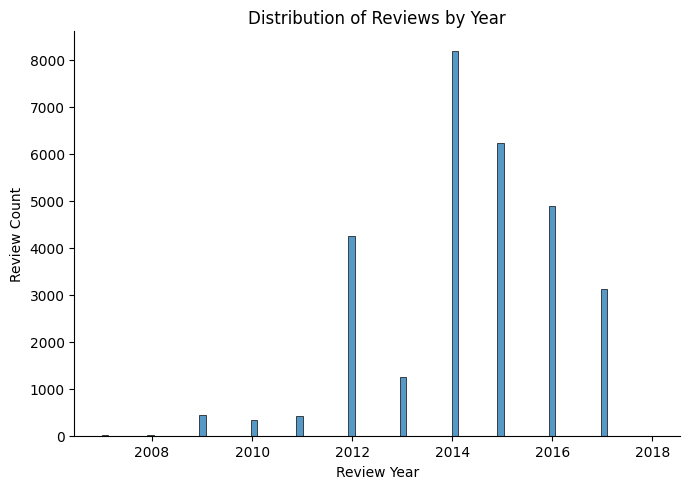

In [73]:
# Create a distribution plot of reviews by year
sns.displot(
    data=df_reviews_clean,
    x=df_reviews_clean['reviews_date'].dt.year,
    kde=False,
    height=5,
    aspect=1.4
).set(
    title="Distribution of Reviews by Year",
    xlabel="Review Year",
    ylabel="Review Count"
)

plt.tight_layout()
plt.show()

#### **Inference from the Review Distribution by Year**

- **Very few reviews appear before 2011**, indicating little activity or limited data availability during early years.

- **A noticeable increase occurs in 2012**, where review counts rise significantly compared to prior years.

- **Review activity drops in 2013**, showing fewer reviews than in 2012.

- **The most significant spike occurs in 2014**, which records the **highest number of reviews** in the entire dataset. This is the clear peak year for review activity.

- **Review counts remain relatively high in 2015 and 2016**, though lower than the 2014 peak.

- **Activity declines further in 2017**, continuing a downward trend from the earlier peak years.

- **Data for 2018 shows almost no activity**, likely because the dataset does not include complete review records for that year.

---

#### **Summary**
The review trend shows a **major surge in 2014**, followed by a gradual decline. No sharp increase occurs in 2013—rather, **2014 is the true inflection point** with the highest user engagement in the dataset.



**Checking Movie categories by Rating**

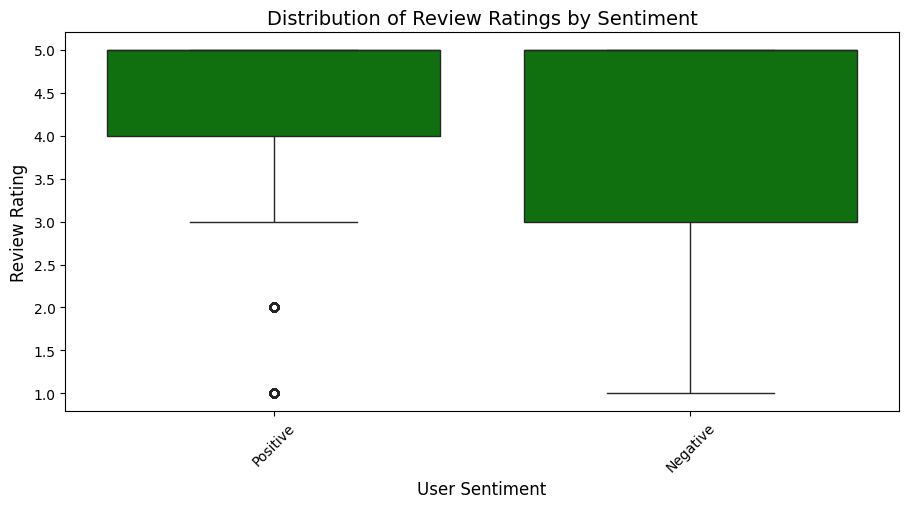

In [76]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_reviews_clean,
    x='user_sentiment',
    y='reviews_rating',
    color='green'
)

plt.title("Distribution of Review Ratings by Sentiment", fontsize=14)
plt.xlabel("User Sentiment", fontsize=12)
plt.ylabel("Review Rating", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout(pad=4)
plt.show()

#### **Accurate Inferences from the Boxplot: Review Ratings by Sentiment**

- **Positive reviews generally have higher ratings**, with most ratings clustering between **4 and 5**.  
  The median rating for positive sentiment lies at **5**, showing that users who express positive sentiment tend to give the highest possible score.

- **Negative reviews show a wider spread of ratings**, ranging from **1 to 5**.  
  Although the lower ratings (1–2) are more common for negative sentiment, there are still several negative reviews with ratings as high as **4 and 5**, indicating mismatches between rating and sentiment text.

- **Both sentiment groups share the same upper bound (rating = 5)**, which means that giving a high rating does not always correspond to positive textual sentiment.

- **Outliers exist in both categories**, especially:
  - **Positive sentiment with ratings 1–2**, meaning some users wrote positive-text reviews but gave low star ratings.
  - **Negative sentiment includes high-rating outliers**, meaning some users wrote negative-text reviews but rated the product favorably.

- **Negative reviews have a visibly lower median rating** (around **3**) compared to positive ones, confirming that rating distributions do somewhat align with sentiment labels, but not perfectly.

---

#### **Summary**
The boxplot reveals that although ratings and sentiment generally correlate, **there are notable inconsistencies**—some users leave positive comments but assign low ratings and vice versa. This highlights why text-based sentiment analysis is necessary rather than relying solely on numerical ratings.


#### Identify and Analyze Conflicting Cases
- We can extract cases where the sentiment label does not align with the rating and analyze their text.

In [79]:
# -----------------------------
# Identify Misclassified Reviews
# -----------------------------

# High ratings (4–5) incorrectly labeled as negative
high_rating_negative = df_reviews_clean[
    (df_reviews_clean['reviews_rating'] >= 4) &
    (df_reviews_clean['user_sentiment'] == 'Negative')
]

# Low ratings (1–2) incorrectly labeled as positive
low_rating_positive = df_reviews_clean[
    (df_reviews_clean['reviews_rating'] <= 2) &
    (df_reviews_clean['user_sentiment'] == 'Positive')
]

# -----------------------------
# Display Sample Mismatched Reviews
# -----------------------------
print("High Ratings (4–5) Labeled as Negative:")
print(high_rating_negative[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))
print("\n--------------------------------------------------\n")

print("Low Ratings (1–2) Labeled as Positive:")
print(low_rating_positive[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))

High Ratings (4–5) Labeled as Negative:
     reviews_rating  \
92                4   
96                4   
100               4   
106               4   
117               4   
121               4   
144               4   
153               4   
160               4   
166               4   

                                                                                                                                                                                                                                                   reviews_text  \
92                                                                                                                                       It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.   
96                                                                                                                                             In only a week I can see the difference in my

#### **Observations Based on the Output**

An examination of the extracted samples reveals clear **misalignments between star ratings and sentiment labels**, indicating issues with the original annotation process. These inconsistencies suggest that several reviews were incorrectly categorized, rather than reflecting sarcasm or mixed sentiment.

---

#### **1. High Ratings (4–5 Stars) Incorrectly Labeled as Negative**
Many reviews with 4- or 5-star ratings express strong satisfaction, describing benefits such as:
- smoother skin  
- deep hydration  
- effective absorption  
- reduction in blemishes  

**Example:**  
> *"Regenerist provides deep hydration for the skin. I find my skin is smoother after use."*  
This review is clearly positive in tone but was labeled as **Negative**, indicating a misclassification rather than sarcasm.

**Conclusion:**  
These cases overwhelmingly reflect **positive sentiment** and should not be classified as negative.

**Recommended Action:**  
Reclassify sentiment as **"Positive"** whenever:  
`reviews_rating ≥ 4` **AND** `user_sentiment == 'Negative'`

---

#### **2. Low Ratings (1–2 Stars) Incorrectly Labeled as Positive**
Several reviews with low ratings describe dissatisfaction, disappointment, or product failure, yet were labeled as **Positive**.

**Example:**  
> *"Purchased this thinking it would have some sort of warming effect, but it's the same as the original. Don't waste your money."*  
This conveys clear negative sentiment but was classified as positive.

**Another example:**  
> *"Leaves windows with streaks, although it does seem to work OK on other surfaces."*  
The tone is mostly negative, despite acknowledging limited effectiveness.

While a few instances might involve subtle sarcasm, the majority are straightforward negative reviews that were mislabeled.

**Recommended Action:**  
Reclassify sentiment as **"Negative"** whenever:  
`reviews_rating ≤ 2` **AND** `user_sentiment == 'Positive'`

---

#### **Overall Insight**
The inconsistencies indicate that the dataset contains **numerous sentiment labeling errors**, especially when ratings contradict the assigned sentiment category. Correcting these cases will significantly improve sentiment model performance and dataset reliability.


**Alignment of Sentiment based on given Ratings**

In [82]:
# Function to correct mislabeled sentiment based on rating logic
def correct_sentiment(row):
    sentiment = str(row['user_sentiment']).strip().lower()
    rating = row['reviews_rating']
    
    # High ratings (4–5) should reflect positive sentiment
    if rating >= 4 and sentiment == 'negative':
        return 'Positive'
    
    # Low ratings (1–2) should reflect negative sentiment
    elif rating <= 2 and sentiment == 'positive':
        return 'Negative'
    
    # Otherwise, keep the original sentiment label
    return row['user_sentiment']

# Apply the correction logic to the dataset
df_reviews_clean['user_sentiment'] = df_reviews_clean.apply(correct_sentiment, axis=1)

<Figure size 1000x600 with 0 Axes>

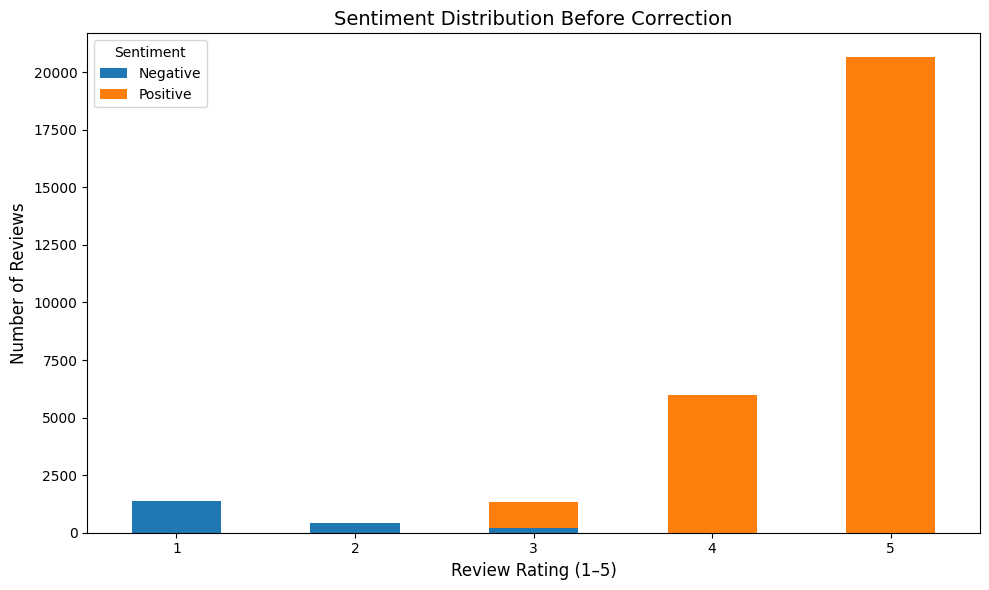

In [83]:
# Plot sentiment distribution before correction
plt.figure(figsize=(10, 6))

(
    df_reviews_clean
    .groupby(['reviews_rating', 'user_sentiment'])
    .size()
    .unstack(fill_value=0)
    .plot(kind='bar', stacked=True, figsize=(10, 6))
)

plt.title("Sentiment Distribution Before Correction", fontsize=14)
plt.xlabel("Review Rating (1–5)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()
plt.show()

#### **Accurate Inferences from the Sentiment Distribution Before Correction**

- **5-star reviews make up the largest portion of the dataset**, with an overwhelming majority labeled as **Positive**. This indicates that most users tend to give the highest rating and express positive sentiment.

- **4-star reviews also show a strong dominance of Positive sentiment**, though with noticeably fewer reviews than 5-star ratings. Positive sentiment aligns well with the rating expectation here.

- **3-star reviews contain mostly Positive sentiment**, suggesting that many users perceive a 3-star rating as acceptable or favorable. This indicates a potential rating bias where moderate ratings still carry positive sentiment.

- **1-star and 2-star reviews are predominantly Negative**, which aligns correctly with the expected sentiment for low ratings. Users assigning lower ratings generally express dissatisfaction.

- A **small number of Negative reviews appear in 3-star category**, indicating sentiment–rating mismatches. These inconsistencies highlight issues with label accuracy prior to correction.

- **No Positive sentiment appears within the 1-star category**, and very minimal (if any) positive sentiment appears in 2-star reviews, which is consistent with correct labeling.

---

#### **Summary**
The distribution clearly shows:
- Strong positive sentiment for high ratings (4–5 stars)
- Strong negative sentiment for low ratings (1–2 stars)
- Minor but notable sentiment–rating inconsistencies, especially where moderate ratings (3 stars) are labeled as Positive and occasional Negative labels appear at higher ratings.

These inconsistencies justify the need for correcting misclassified sentiment labels.


### Type Conversion

In [86]:
# List of text-based columns that require conversion to string
text_columns = [
    'brand', 'categories', 'manufacturer', 'name',
    'reviews_text', 'reviews_title', 'reviews_username'
]

# Convert selected columns to string type
df_reviews_clean[text_columns] = df_reviews_clean[text_columns].astype(str)

### Data PreProcessing

<img src="images/preprocess.png" style="display:block; margin-left:auto; margin-right:auto; width:500px; height:500px;"/>

In [88]:
# Getting a copy of dataframe for pre-processing
df_reviews_preprocessed = df_reviews_clean.copy()

**Combining reviews_text and reviews_title columns into reviews_combined and dropping the initial fields**

In [90]:
df_reviews_preprocessed['full_review'] = df_reviews_preprocessed['reviews_title'] + " " + df_reviews_preprocessed['reviews_text']
df_reviews_preprocessed.drop(columns=['reviews_title', 'reviews_text'], inplace=True)

In [91]:
df_reviews_preprocessed.shape

(29748, 10)

In [92]:
df_reviews_preprocessed[["full_review", "user_sentiment"]].sample(10)

,full_review,user_sentiment
13730,"excellent It whitens, brightens disinfects I use it for different uses laundry, cleaning house etc.nothing beats Clorox that I have found yet. This review was collected as part of a promotion.",Positive
12606,"ALWAYS SMELLS CLEAN LOVE THE WAY IT CLEANS AND SMELLS, NEVER LETS ME DOWN This review was collected as part of a promotion.",Positive
10103,Best things ever I love these things. I use them everyday. They keep my house clean and they are convent and ready when I need them.,Positive
19051,"Great one Great always to have on hand, specially withlittle ones in potty training :)",Positive
9400,"Great Product! We love Clorox disinfecting wipes. With three pets and our second baby on the way, we love the convenience and quality of Clorox. This review was collected as part of a promotion.",Positive
5564,Quick processing and shipping This is the best product ever and is only available here,Positive
12651,Clorex wipes I love to know that I am killing germs while I clean. This review was collected as part of a promotion.,Positive
23456,"Decent updated Godzilla *spoiler alert* I think it lacks a little bit of the classic Godzilla element but it still puts on a good show. It seems to focus not as much on Godzilla and his enemy but more on the main characters sob story, which leaves you wanting more. The battle between Godzilla an...",Positive
5747,great movie for bruce willis fans It is definitely an action film and was glad that it was so cheap to buy since i've been wanting to see this for awhile.,Positive
14706,"Love these wipes I love these wipes, I use them everyday in the kitchen and dinner table. This review was collected as part of a promotion.",Positive


In [93]:
df_reviews_preprocessed.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_rating', 'reviews_username', 'user_sentiment', 'full_review'],
      dtype='object')

**Dropping columns which are not needed for analysis**

In [95]:
df_reviews_preprocessed.drop(columns=['categories', 'manufacturer', 'reviews_date'], inplace=True)

In [96]:
df_reviews_preprocessed.head(1)

,id,brand,name,reviews_rating,reviews_username,user_sentiment,full_review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.


**Creating dataframe for Sentiment analysis with only the required columns**

In [98]:
df_sent_analysis = df_reviews_preprocessed[['id','name','full_review', 'reviews_rating', 'user_sentiment']]

In [99]:
df_sent_analysis.shape

(29748, 5)

In [100]:
df_sent_analysis.head()

,id,name,full_review,reviews_rating,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as part of a promotion.,5,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,5,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....",1,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,1,Negative


In [101]:
import re
import string
from contractions import fix
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    """
    Preprocess review text by:
    - Expanding contractions
    - Lowercasing
    - Removing numbers, punctuation, and special patterns
    - Normalizing whitespace
    - Tokenizing
    - Removing stopwords
    - Lemmatizing tokens
    
    Returns a clean, preprocessed string.
    """

    # Handle non-string inputs gracefully
    if not isinstance(text, str):
        return ""

    # 1. Expand contractions (e.g., “don’t” → “do not”)
    text = fix(text)

    # 2. Lowercase the text
    text = text.lower().strip()

    # 3. Remove unwanted patterns
    text = re.sub(r"\[.*?\]", "", text)            # Remove text inside brackets
    text = re.sub(r"\d+", "", text)                # Remove numbers
    text = re.sub(r"\s+", " ", text)               # Normalize whitespace

    # 4. Remove punctuation efficiently
    punctuation_table = str.maketrans("", "", string.punctuation)
    text = text.translate(punctuation_table)

    # 5. Tokenization
    tokens = word_tokenize(text)

    # 6. Stopword removal
    tokens = [word for word in tokens if word not in stop_words]

    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


In [102]:
#!pip install contractions

In [103]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [104]:
df_final = df_sent_analysis[['id','name', 'full_review', 'reviews_rating', 'user_sentiment']]

In [105]:
# Apply preprocessing
df_final['cleaned_review'] = df_final['full_review'].apply(preprocess_text)

In [106]:
df_final.head()

,id,name,full_review,reviews_rating,user_sentiment,cleaned_review
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as part of a promotion.,5,Positive,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,5,Positive,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....",1,Negative,disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked cap...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,1,Negative,irritation husband bought gel u gel caused irritation felt like burning skin would recommend gel


#### WordCloud

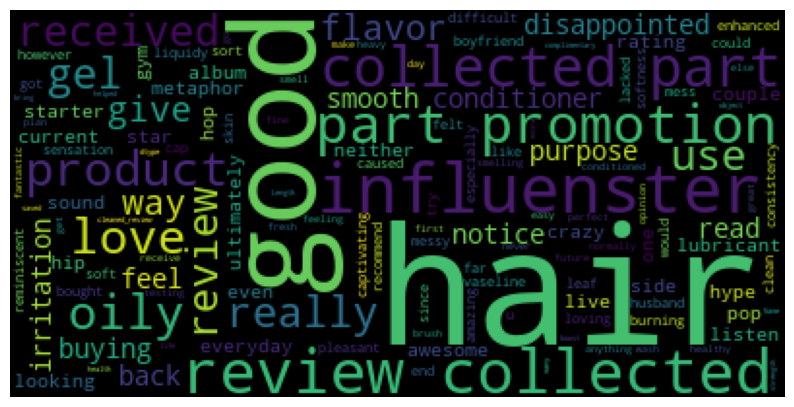

In [108]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df_final.cleaned_review))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Review Length Analysis with respect to Sentiment Label
- Check if Review Length Differs by Sentiment Label

In [110]:
df_final['review_length'] = df_final['cleaned_review'].apply(len)

In [111]:
# check if positive and negative reviews have significantly different lengths.

df_final.groupby('user_sentiment')['review_length'].describe()

,count,mean,std,min,25%,50%,75%,max
user_sentiment,,,,,,,,
Negative,1987.0,195.42,153.98,8.0,93.0,160.0,250.0,2320.0
Positive,27761.0,122.13,108.81,4.0,65.0,94.0,142.0,3815.0


#### **Inferences Based on the Output**

- **Negative reviews are significantly longer on average** than positive reviews.  
  - Negative mean length: **195.42**  
  - Positive mean length: **122.13**  
  This suggests that users tend to write more detailed explanations when expressing dissatisfaction.

- **The variability (standard deviation) in negative review length is also higher** (153.98 vs. 108.81), indicating greater inconsistency in how much users write when leaving negative feedback.

- **The maximum length of positive reviews is higher** (3815 characters) compared to negative reviews (2320 characters).  
  This indicates that although negatives are typically longer, some positive reviews can be extremely verbose.

- **Median (50th percentile) lengths show the same pattern:**  
  - Negative reviews median: **160 characters**  
  - Positive reviews median: **94 characters**  
  Again confirming that negative reviews consistently contain more text.

- **Lower quartile (25th percentile) also reflects the trend:**  
  - Negative: **93 characters**  
  - Positive: **65 characters**  
  Even shorter negative reviews tend to be more descriptive.

- **Negative reviews are fewer in number (1,987) compared to positive reviews (27,761)**, but they contain richer textual information per review.

---

#### **Summary**
Negative reviews are **substantially longer, more detailed, and more variable**, while positive reviews are **shorter and more uniform**, suggesting that dissatisfied users provide more explanation to justify their sentiment.


#### Analysis : Review Length vs. Sentiment

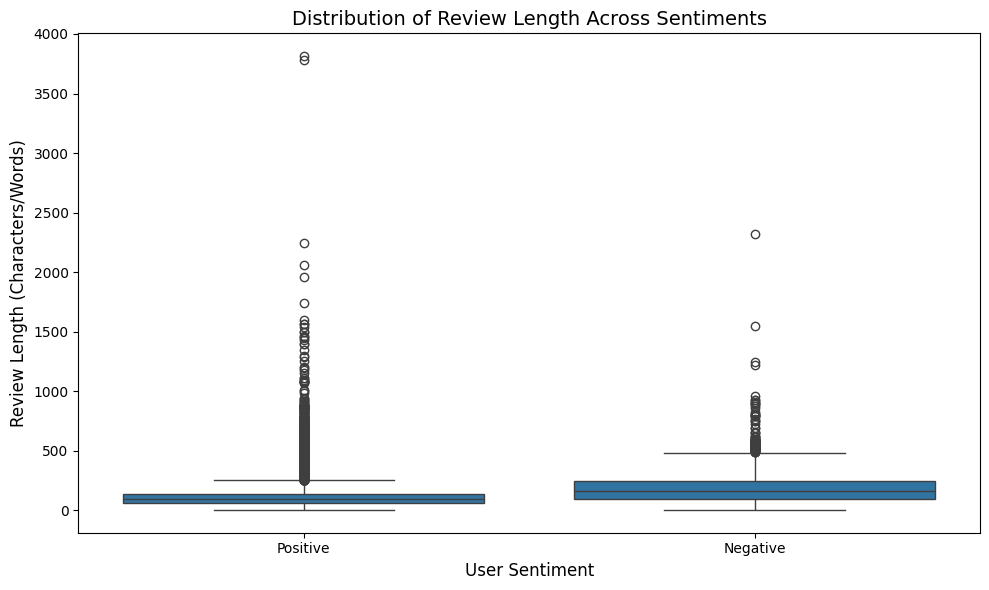

In [114]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_final,
    x='user_sentiment',
    y='review_length'
)

plt.title("Distribution of Review Length Across Sentiments", fontsize=14)
plt.xlabel("User Sentiment", fontsize=12)
plt.ylabel("Review Length (Characters/Words)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Inferences from the Distribution of Review Length Across Sentiments**

The boxplot provides insights into how review length varies between **Positive** and **Negative** sentiment categories:

---

#### **1. Negative Reviews tend to be longer on average**
- The median review length for **Negative** sentiment is noticeably higher than that for **Positive** sentiment.
- This indicates that users expressing dissatisfaction often write **longer, more detailed explanations** of their negative experiences.

---

#### **2. Positive Reviews are generally shorter and more consistent**
- Positive reviews cluster more tightly around shorter lengths.
- Many positive reviews may be brief affirmations (e.g., “Great product!”, “Loved it!”), leading to a lower median and tighter interquartile range (IQR).

---

#### **3. Both Sentiments contain extreme outliers**
- Extremely long reviews (1000–3800 characters/words) appear in both categories.
- These outliers likely represent customers who provide **very detailed feedback**, regardless of sentiment.
- However, the **Positive** category shows more very-long outliers, including the maximum review length (~3800).

---

#### **4. Negative Reviews show higher variability**
- The boxplot for Negative sentiment spans a wider range.
- This suggests users vary more in how much they express dissatisfaction — from short complaints to lengthy, detailed critiques.

---

#### **5. Review Length is not a perfect indicator of sentiment**
- Despite differences in medians and ranges, both positive and negative reviews overlap significantly.
- This indicates that review length alone cannot reliably predict sentiment but **may serve as a useful supporting feature** in modeling.

---

#### **Summary**
Negative reviews are generally longer and more varied, while positive reviews tend to be shorter and more consistent. Both categories contain long-form outliers, showing that highly detailed feedback can be both appreciative and critical. T


### Statistical Hypothesis Testing
- To confirm statistically whether review length significantly differs between positive and negative reviews, use a t-test.

In [117]:
import scipy.stats as stats

# Separate review lengths by sentiment
positive_reviews = df_final[df_final['user_sentiment'] == 'Positive']['review_length']
negative_reviews = df_final[df_final['user_sentiment'] == 'Negative']['review_length']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(
    positive_reviews,
    negative_reviews,
    equal_var=False
)

print("Welch's T-Test for Review Length Differences")
print(f"T-statistic : {t_stat:.4f}")
print(f"P-value     : {p_value:.6f}")


if p_value < 0.05:
    print("\n Result: Statistically significant difference in review length between sentiments.")
else:
    print("\n Result: No statistically significant difference in review length between sentiments.")

Welch's T-Test for Review Length Differences
T-statistic : -20.8493
P-value     : 0.000000

 Result: Statistically significant difference in review length between sentiments.


### TF-IDF Feature Extraction

### **Feature Extraction Using TF-IDF**

To transform the raw review text into numerical features suitable for machine learning models, we apply **TF-IDF (Term Frequency–Inverse Document Frequency)**. This method highlights terms that are important within individual reviews while down-weighting terms that are overly common across the corpus.

- **`max_df`** controls the removal of extremely frequent terms.  
  These are often non-informative and act as **corpus-specific stopwords**.  
  Setting `max_df = 0.95` means:  
  **Ignore terms that appear in more than 95% of all documents**, as they provide little discriminative value.

- **`min_df`** controls the removal of extremely rare terms.  
  These terms contribute noise, add sparsity, and rarely help the model generalize.  
  Setting `min_df = 5` means:  
  **Ignore terms that appear in fewer than 5 documents**, ensuring that only meaningful and recurring terms remain.

This configuration helps create a more robust, informative TF-IDF feature matrix by filtering out both overly common and overly rare words.


In [120]:
df_final.head()

,id,name,full_review,reviews_rating,user_sentiment,cleaned_review,review_length
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,115
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as part of a promotion.,5,Positive,good good flavor review collected part promotion,48
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,5,Positive,good good flavor,16
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....",1,Negative,disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked cap...,413
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,1,Negative,irritation husband bought gel u gel caused irritation felt like burning skin would recommend gel,96


In [121]:
# Split into 80% train, 20% test
X = df_final[['cleaned_review', 'review_length']]
y = df_final['user_sentiment'].map({'Positive': 1, 'Negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [122]:
#Check for duplication of reviews in train and test dataset to avoid data leakage
overlap = pd.merge(
    X_train[['cleaned_review']],
    X_test[['cleaned_review']],
    on='cleaned_review',
    how='inner'
).drop_duplicates()
overlap_vals = overlap['cleaned_review'].unique()
print(f"Number of overlapping samples: {len(overlap_vals)}")
print(f"X_train shape before: {X_train.shape}")

Number of overlapping samples: 858
X_train shape before: (23798, 2)


In [123]:
from typing import Tuple
import pandas as pd

def remove_overlapping_reviews(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    overlap: pd.DataFrame,
    text_col: str = "cleaned_review"
) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Remove rows from X_train / y_train where the review text appears in `overlap`.

    Parameters
    ----------
    X_train : pd.DataFrame
        Training features containing a text column.
    y_train : pd.Series
        Training target aligned with X_train (same index).
    overlap : pd.DataFrame
        DataFrame containing text entries that should be treated as overlap.
    text_col : str, optional
        Name of the column in X_train and overlap that contains the cleaned text, by default "cleaned_review".

    Returns
    -------
    Tuple[pd.DataFrame, pd.Series]
        (X_train_cleaned, y_train_cleaned) with overlapping rows removed and indices reset.
    """

    # Ensure the text column exists
    if text_col not in X_train.columns:
        raise KeyError(f"'{text_col}' not found in X_train columns.")

    if text_col not in overlap.columns:
        raise KeyError(f"'{text_col}' not found in overlap columns.")

    # Work on copies so originals are preserved
    X = X_train.copy()
    y = y_train.copy()

    # Build boolean mask and compute indices to drop (use index to avoid misalignment)
    overlap = pd.merge(
        X_train[[text_col]],
        X_test[[text_col]],
        on=text_col,
        how='inner'
    ).drop_duplicates()

    overlap_vals = overlap[text_col].unique()
    overlap_mask = X_train[text_col].isin(overlap_vals)
    indices_to_drop = X[overlap_mask].index

    removed_count = len(indices_to_drop)
    before_shape = X.shape

    # Drop by index and reset indexes
    if removed_count > 0:
        X = X.drop(index=indices_to_drop).reset_index(drop=True)
        # Align y by dropping the same indices
        y = y.drop(index=indices_to_drop).reset_index(drop=True)
    else:
        
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)

    after_shape = X.shape

    print(f"Removed overlapping rows: {removed_count}")
    print(f"X_train shape before: {before_shape} -> after: {after_shape}")

    return X, y


In [124]:
X_train_clean, y_train_clean = remove_overlapping_reviews(X_train, y_train, overlap, text_col='cleaned_review')

Removed overlapping rows: 913
X_train shape before: (23798, 2) -> after: (22885, 2)


In [125]:
# TF-IDF extraction from text feature
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=0.01,
    max_df=0.8,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['cleaned_review'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['cleaned_review'])

In [126]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

scaler = MinMaxScaler()

# Fit scaler on training numeric features only
X_train_num = scaler.fit_transform(X_train[['review_length']])
X_test_num = scaler.transform(X_test[['review_length']])

# Combine scaled numeric features with TF-IDF
X_train_combined = hstack((X_train_tfidf, X_train_num))
X_test_combined = hstack((X_test_tfidf, X_test_num))

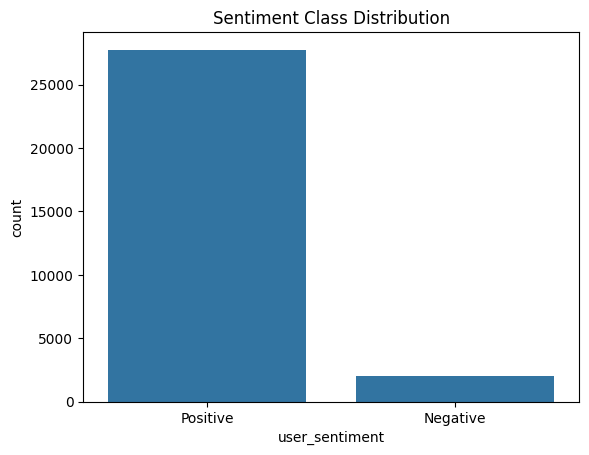

user_sentiment
Positive    93.32
Negative     6.68
Name: proportion, dtype: float64


In [127]:
# Check class distribution

sns.countplot(x=df_final['user_sentiment'])
plt.title("Sentiment Class Distribution")
plt.show()

# Print exact counts
print(df_final['user_sentiment'].value_counts(normalize=True) * 100)  # Percentage of each class

#### **Inferences from the Sentiment Class Distribution**

- The dataset is **highly imbalanced**, with **Positive reviews dominating the distribution**.
  - **Positive sentiment:** ~93.32% of all reviews  
  - **Negative sentiment:** ~6.68% of all reviews  

- This strong skew indicates that the majority of users express favorable opinions about the products, while only a small fraction leave negative feedback.

- The **imbalance poses a significant challenge for model training**, as a classifier may become biased toward predicting the majority class (Positive) and perform poorly on the minority class (Negative).

- Special handling techniques will likely be required to improve model performance, such as:
  - **Resampling methods** (e.g., oversampling the Negative class or undersampling the Positive class)
  - **Class-weight adjustments** during model training
  - **Synthetic data generation** (e.g., SMOTE)
  - **Using evaluation metrics** beyond accuracy (e.g., F1-score, recall, ROC-AUC)

- The low proportion of negative sentiment also suggests that **user complaints or dissatisfaction are relatively rare** within the dataset, which could affect the system's ability to learn nuanced negative expressions.

---

#### **Summary**
The dataset is overwhelmingly positive (~93%), creating a substantial class imbalance that must be addressed to build a reliable sentiment classification model.


In [129]:
from imblearn.combine import SMOTETomek
from collections import Counter

# -------------------------------
# Apply SMOTE + Tomek Links (Train Set Only)
# -------------------------------

# Initialize the resampling technique
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Fit and resample
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_combined, y_train)

# -------------------------------
# Review the Resampled Distribution
# -------------------------------

print("\n Class Distribution Before Resampling:")
print(pd.Series(y_train).value_counts(normalize=True).mul(100).round(2))

print("\n Class Distribution After SMOTE + Tomek:")
print(pd.Series(y_train_resampled).value_counts(normalize=True).mul(100).round(2))

print("\n Resampled shapes:")
print(f"X_train_resampled: {X_train_resampled.shape}")
print(f"y_train_resampled: {y_train_resampled.shape}")


 Class Distribution Before Resampling:
user_sentiment
1    93.32
0     6.68
Name: proportion, dtype: float64

 Class Distribution After SMOTE + Tomek:
user_sentiment
1    50.0
0    50.0
Name: proportion, dtype: float64

 Resampled shapes:
X_train_resampled: (44390, 343)
y_train_resampled: (44390,)


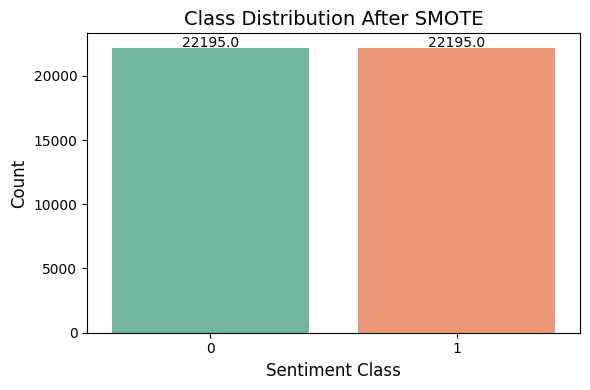

In [130]:
plt.figure(figsize=(6, 4))

sns.countplot(x=y_train_resampled, palette="Set2")
plt.title("Class Distribution After SMOTE", fontsize=14)
plt.xlabel("Sentiment Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add value labels on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2, 
        height + 50,                   
        f"{height}", 
        ha="center", 
        fontsize=10
    )

plt.tight_layout()
plt.show()

#### **Insights from the Class Distribution After Applying SMOTE**

---

#### **1. Successful Balancing of Sentiment Classes**
The application of **SMOTETomek** has resulted in a perfectly balanced dataset, with an equal number of samples in both sentiment classes.  
- **Class 0 (Negative): ~22,195 samples**  
- **Class 1 (Positive): ~22,195 samples**  
This eliminates the extreme class imbalance present earlier (≈93% positive, 7% negative), ensuring the model no longer defaults toward predicting the majority class.

---

#### **2. Improved Model Learning and Fairness**
With balanced classes, the model can now:
- Learn **meaningful features for both positive and negative sentiment**,  
- **Avoid biasing predictions** toward the previously dominant class, and  
- Handle real-world use cases where identifying negative sentiment is especially important (e.g., product defects, customer complaints).

This balanced training set promotes **better generalization** and **more equitable performance** across classes.

---

#### **3. Consideration of SMOTE-Related Risks**
While SMOTE helps mitigate imbalance, it synthesizes new samples rather than collecting real data.  
This can introduce risks such as:
- **Overfitting to synthetic patterns**,  
- Reduced model robustness if the minority class originally contained noisy or highly varied samples,  
- Artificial inflation of metrics when evaluated only on resampled data.

Thus, SMOTE should be applied **only to the training set**, never to validation or test sets.

---

#### **4. Importance of Rigorous Model Evaluation**
With oversampling applied, traditional accuracy metrics might not fully reflect model performance.  
To ensure reliable evaluation, you should use:
- **Precision, Recall, and F1-score**, especially for the minority (negative) class  
- **ROC-AUC** to assess class separability  
- **Cross-validation** to confirm the model generalizes beyond the resampled training data  

These approaches help detect any weaknesses introduced by synthetic data and validate that performance improvements are genuine.

---

#### **Summary**
The SMOTETomek process has successfully rebalanced the dataset, enabling the model to learn from both sentiment classes equally. However, **careful evaluation is necessary** to prevent overconfidence and ensure that the model remains reliable when exposed to real-world, unseen data.


In [132]:
#!pip install imblearn

### Building Model

                ┌───────────────────────────────┐
                │        ModelBuilder Class      │
                └───────────────┬───────────────┘
                                │
                                ▼
        ┌─────────────────────────────────────────────┐
        │   Initialization                             │
        │   - Store model, train/test data             │
        └─────────────────────────────────────────────┘
                                │
                                ▼
        ┌─────────────────────────────────────────────┐
        │   Training                                   │
        │   - Fit model on training data               │
        │   - Predict classes on test data             │
        └─────────────────────────────────────────────┘
                                │
                                ▼
        ┌─────────────────────────────────────────────┐
        │   Evaluation Pipeline                        │
        │   - Compute metrics: Accuracy, Precision,    │
        │     Recall, F1, ROC-AUC                      │
        │   - Display classification report            │
        │   - Plot confusion matrix (counts + %)       │
        │   - Plot ROC curve                           │
        │   - Optionally save plots                    │
        └─────────────────────────────────────────────┘
                                │
                                ▼
                ┌───────────────────────────────┐
                │   Results & Outputs            │
                │   - Metrics dictionary         │
                │   - Reports & visual plots     │
                │   - Saved figures (optional)   │
                └───────────────────────────────┘


In [134]:
import logging
from typing import Any, Dict, Optional, Tuple
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report

# Configure logging once at the top of your notebook/script
logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)


class ModelBuilder:
    """
    Helper class to train and evaluate a classification model with convenient plotting.

    Parameters
    ----------
    model : estimator
        A scikit-learn-like estimator implementing fit() and predict().
    x_train, x_test : array-like
        Training and test features.
    y_train, y_test : array-like
        Training and test labels (binary or multiclass).
    """

    def __init__(
        self,
        model: Any,
        x_train: Any,
        x_test: Any,
        y_train: Any,
        y_test: Any,
    ) -> None:
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self) -> Any:
        """Train the model and return predicted classes on the test set."""
        logger.info("Training model...")
        self.model.fit(self.x_train, self.y_train)
        y_pred = self.model.predict(self.x_test)
        logger.info("Training complete.")
        return y_pred

    def evaluate_model(
        self,
        y_pred_class: Any,
        *,
        save_plots: Optional[str] = None,
        return_plots: bool = False
    ) -> Dict[str, Optional[float]]:
        """
        Run a full evaluation pipeline: prints metrics, displays classification report,
        plots confusion matrix and ROC curve.

        Parameters
        ----------
        y_pred_class : array-like
            Predicted class labels for x_test.
        save_plots : Optional[str]
            Directory path to save the generated plots (set to None to avoid saving).
        return_plots : bool
            If True, return matplotlib figure objects for further processing.

        Returns
        -------
        results : dict
            Dictionary containing Accuracy, Precision, Recall, F1 Score, ROC-AUC (if available).
        """
        logger.info("\n" + "=" * 30)
        logger.info("MODEL EVALUATION STARTED")
        logger.info("=" * 30 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        logger.info("\n" + "=" * 30)
        logger.info("CLASSIFICATION REPORT")
        logger.info("=" * 30 + "\n")
        self.display_classification_report(y_pred_class)

        logger.info("\n" + "=" * 30)
        logger.info("CONFUSION MATRIX")
        logger.info("=" * 30 + "\n")
        cm_fig = self.plot_confusion_matrix(y_pred_class)
        if save_plots and cm_fig:
            cm_fig.savefig(f"{save_plots}/confusion_matrix.png", bbox_inches="tight")

        logger.info("\n" + "=" * 30)
        logger.info("ROC CURVE")
        logger.info("=" * 30 + "\n")
        roc_fig = self.plot_roc_curve()
        if save_plots and roc_fig:
            roc_fig.savefig(f"{save_plots}/roc_curve.png", bbox_inches="tight")

        logger.info("\n" + "=" * 30)
        logger.info("MODEL EVALUATION COMPLETED")
        logger.info("=" * 30 + "\n")

        if return_plots:
            return {"results": results, "confusion_fig": cm_fig, "roc_fig": roc_fig}
        return results

    def evaluate_metrics(self, y_pred_class: Any) -> Dict[str, Optional[float]]:
        """
        Compute core classification metrics and ROC-AUC if available.
        Returns a dictionary of results (numbers are floats, proportions between 0 and 1).
        """
        # Basic checks
        if len(np.unique(self.y_test)) == 1:
            logger.warning("Only one class present in y_test — some metrics may be undefined.")

        results: Dict[str, Optional[float]] = {}
        results["Accuracy"] = metrics.accuracy_score(self.y_test, y_pred_class)
        # For precision/recall/f1, handle zero_division to avoid exceptions
        results["Precision"] = metrics.precision_score(self.y_test, y_pred_class, zero_division=0)
        results["Recall"] = metrics.recall_score(self.y_test, y_pred_class, zero_division=0)
        results["F1 Score"] = metrics.f1_score(self.y_test, y_pred_class, zero_division=0)

        # ROC-AUC: try predict_proba, then decision_function
        roc_auc: Optional[float] = None
        try:
            if hasattr(self.model, "predict_proba"):
                y_scores = self.model.predict_proba(self.x_test)[:, 1]
                roc_auc = metrics.roc_auc_score(self.y_test, y_scores)
            elif hasattr(self.model, "decision_function"):
                y_scores = self.model.decision_function(self.x_test)
                roc_auc = metrics.roc_auc_score(self.y_test, y_scores)
            else:
                roc_auc = None
        except Exception as exc:
            logger.warning(f"Could not compute ROC-AUC: {exc}")
            roc_auc = None

        results["ROC-AUC Score"] = roc_auc

        # Nicely print metrics as percentages where applicable
        logger.info("\n" + "-" * 30)
        logger.info("MODEL PERFORMANCE METRICS")
        logger.info("-" * 30)
        for metric_name, value in results.items():
            if value is None:
                logger.info(f"{metric_name}: N/A")
            else:
                # show ROC-AUC as proportion, others as percentage
                if metric_name == "ROC-AUC Score":
                    logger.info(f"{metric_name}: {value:.4f}")
                else:
                    logger.info(f"{metric_name}: {value * 100:.2f}%")
        logger.info("-" * 30 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class: Any) -> Optional[plt.Figure]:
        """
        Plot confusion matrix with both counts and normalized percentages.
        Returns the matplotlib Figure for optional saving.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)
        cm_norm = cm.astype("float") / cm.sum()

        labels = np.array([["{:,}\n{:.2%}".format(cm[i, j], cm_norm[i, j]) for j in range(cm.shape[1])]
                           for i in range(cm.shape[0])])

        fig, ax = plt.subplots(figsize=(6, 5))
        sns.heatmap(cm_norm, annot=labels, fmt="", cmap="Blues", cbar=False, ax=ax,
                    xticklabels=["Pred_Neg", "Pred_Pos"][:cm.shape[1]],
                    yticklabels=["True_Neg", "True_Pos"][:cm.shape[0]])
        ax.set_ylabel("True Label")
        ax.set_xlabel("Predicted Label")
        ax.set_title("Confusion Matrix (counts and %)")
        plt.tight_layout()
        plt.show()

        return fig

    def plot_roc_curve(self) -> Optional[plt.Figure]:
        """
        Plot ROC curve if model supports probability or decision scores.
        Returns the matplotlib Figure or None if not supported.
        """
        fig = None
        try:
            if hasattr(self.model, "predict_proba") or hasattr(self.model, "decision_function"):
                fig, ax = plt.subplots(figsize=(6, 5))
                RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test, ax=ax)
                ax.set_title("ROC Curve")
                plt.tight_layout()
                plt.show()
            else:
                logger.warning("ROC Curve cannot be plotted: model has no predict_proba/decision_function.")
        except Exception as exc:
            logger.warning(f"Failed to plot ROC curve: {exc}")
            fig = None

        return fig

    def display_classification_report(self, y_pred_class: Any) -> None:
        """
        Nicely print the classification report (precision/recall/f1 per class).
        """
        try:
            report = metrics.classification_report(self.y_test, y_pred_class)
            print(report)
        except Exception as exc:
            logger.warning(f"Could not generate classification report: {exc}")


### Logistic Regression

Training model...
Training complete.

MODEL EVALUATION STARTED


------------------------------
MODEL PERFORMANCE METRICS
------------------------------
Accuracy: 89.83%
Precision: 98.70%
Recall: 90.29%
F1 Score: 94.31%
ROC-AUC Score: 0.9513
------------------------------


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.38      0.83      0.52       397
           1       0.99      0.90      0.94      5553

    accuracy                           0.90      5950
   macro avg       0.68      0.87      0.73      5950
weighted avg       0.95      0.90      0.92      5950



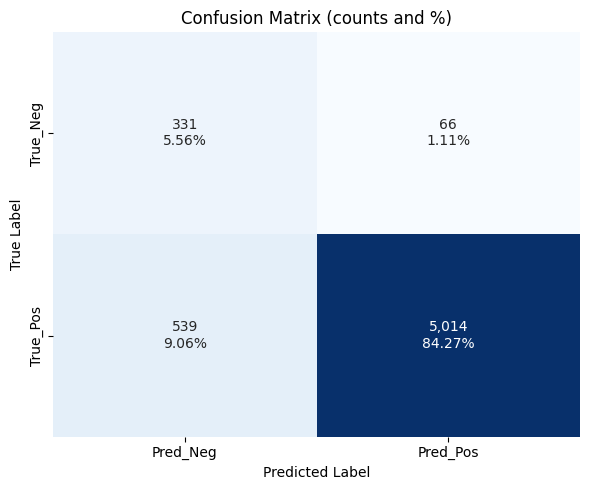


ROC CURVE



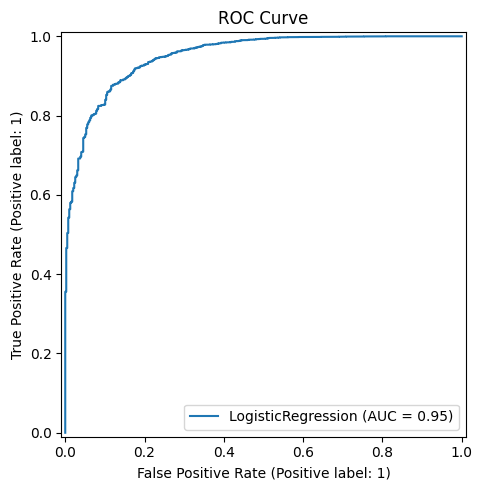


MODEL EVALUATION COMPLETED



In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
lr_model = LogisticRegression()

# Create ModelBuilder instance
lr_model_builder = ModelBuilder(lr_model, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = lr_model_builder.train_model()

# Evaluate model
lr_metrics_result = lr_model_builder.evaluate_model(y_pred)

### **Key Insights from Logistic Regression Model (Before Hyperparameter Tuning)**

#### **1. Strong Overall Predictive Performance**
- The model achieves **89.83% accuracy** and a **ROC-AUC score of 0.9513**, indicating strong discriminative capability even before any tuning.
- The ROC curve suggests that the model is able to separate positive and negative sentiment effectively.

#### **2. Excellent Performance for Majority Class**
- **Positive class (1)** shows **very high precision (0.99)** and **high recall (0.90)**.
- The model is highly reliable when predicting positive sentiment, generating minimal incorrect predictions for this class.

#### **3. Performance Limitations for Minority Class**
- **Negative class (0)** has **low precision (0.38)** despite achieving **high recall (0.83)**.
- This indicates that although many true negative samples are detected, a substantial number of positive samples are incorrectly labeled as negative.

#### **4. Confusion Matrix Indicates Prediction Bias**
- A large number of **positive samples were misclassified as negative (539 false negatives)**.
- Only **66 false positives** occurred, reflecting the model’s tendency to favor positive sentiment predictions.
- This behavior suggests the model is influenced by dataset imbalance.

#### **5. Good Generalization but Requires Fairness Improvements**
- A strong ROC curve shape and AUC value imply that the model generalizes well rather than overfits.
- However, the imbalance in class-wise reliability suggests limited fairness and real-world trust for negative sentiment detection.


### Naive Bayes

Training model...
Training complete.

MODEL EVALUATION STARTED


------------------------------
MODEL PERFORMANCE METRICS
------------------------------
Accuracy: 88.03%
Precision: 98.36%
Recall: 88.65%
F1 Score: 93.26%
ROC-AUC Score: 0.9289
------------------------------


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.33      0.79      0.47       397
           1       0.98      0.89      0.93      5553

    accuracy                           0.88      5950
   macro avg       0.66      0.84      0.70      5950
weighted avg       0.94      0.88      0.90      5950



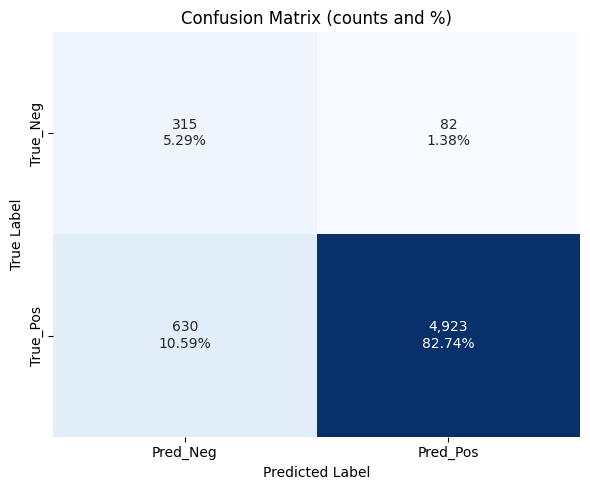


ROC CURVE



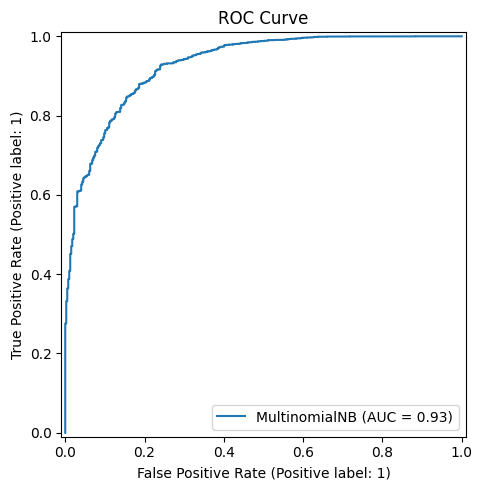


MODEL EVALUATION COMPLETED



In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



# Initialize model

nb_model = MultinomialNB(alpha=1.0)

# Create ModelBuilder instance
nb_model_builder = ModelBuilder(nb_model, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = nb_model_builder.train_model()

# Evaluate model
nb_metrics_result = nb_model_builder.evaluate_model(y_pred)

### **Key Insights from Multinomial Naive Bayes Model (Before Hyperparameter Tuning)**

#### **1. Strong Overall Performance but Slightly Lower Than Logistic Regression**
- The model achieves **88.03% accuracy** and a **ROC-AUC score of 0.9289**, indicating strong discriminative ability, though slightly lower than Logistic Regression.
- The ROC curve shape shows that the model successfully separates the sentiment classes but with more overlap than the previous model.

#### **2. Highly Effective on the Majority Class**
- **Positive class (1)** demonstrates **high precision (0.98)** and **good recall (0.89)**.
- This confirms that the model is very reliable when identifying positive sentiment and maintains strong precision-recall balance for the dominant class.

#### **3. Limited Precision for Minority Class**
- **Negative class (0)** has **low precision (0.33)** but **good recall (0.79)**.
- This means that while the model is able to recognize many true negative cases, it incorrectly labels many positive reviews as negative, leading to **higher false-negative errors**.

#### **4. Confusion Matrix Highlights Misclassification Bias**
- **630 positive samples** were incorrectly predicted as negative.
- **82 negative samples** were incorrectly predicted as positive.
- This imbalance in misclassification indicates that the model prioritizes minimizing false positives rather than maintaining balanced error distribution.

#### **5. Good Generalization but Needs Targeted Bias Handling**
- The ROC curve and F1-score of **0.93** indicate that the model generalizes well to unseen data.
- However, fairness across classes is limited, and negative class predictions require improvement to avoid misleading sentiment interpretation.


### Decision Tree

Training model...
Training complete.

MODEL EVALUATION STARTED


------------------------------
MODEL PERFORMANCE METRICS
------------------------------
Accuracy: 80.94%
Precision: 98.59%
Recall: 80.73%
F1 Score: 88.77%
ROC-AUC Score: 0.8822
------------------------------


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.24      0.84      0.37       397
           1       0.99      0.81      0.89      5553

    accuracy                           0.81      5950
   macro avg       0.61      0.82      0.63      5950
weighted avg       0.94      0.81      0.85      5950



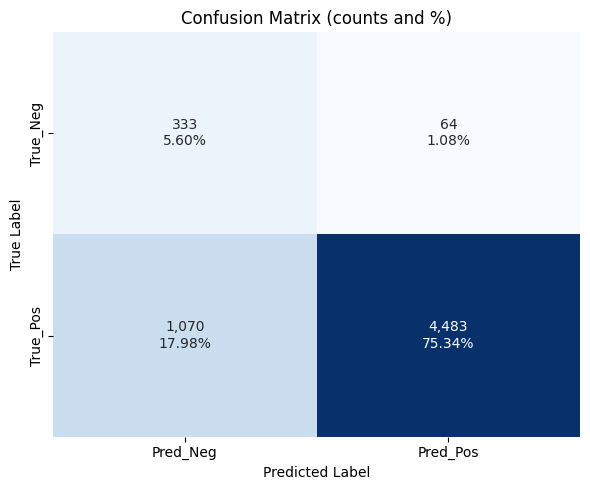


ROC CURVE



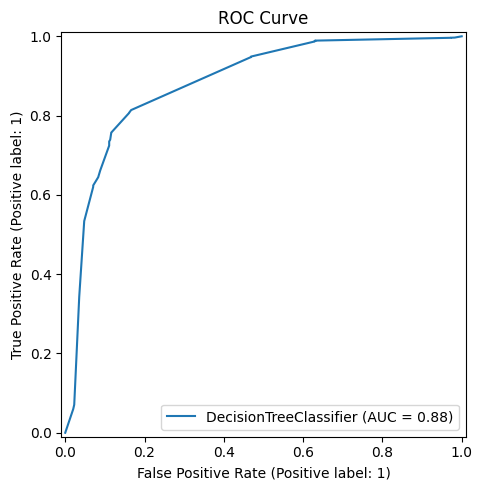


MODEL EVALUATION COMPLETED



In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model

dt_model = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

# Create ModelBuilder instance
dt_model_builder = ModelBuilder(dt_model, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = dt_model_builder.train_model()

# Evaluate model
dt_metrics_result = dt_model_builder.evaluate_model(y_pred)

### **Key Insights from Decision Tree Classifier (Before Hyperparameter Tuning)**

#### **1. Moderate Overall Predictive Performance**
- The model achieved **80.94% accuracy** with a **ROC-AUC score of 0.8822**, indicating weaker discriminative ability compared to Logistic Regression and Naive Bayes.
- The ROC curve shows noticeable drops in true positive rate at certain thresholds, indicating inconsistent decision boundaries.

#### **2. Strong Precision but Lower Recall for the Majority Class**
- **Positive class (1)** demonstrated **very high precision (0.99)** but a lower **recall (0.81)**.
- This suggests that while most predicted positive instances are correct, the model fails to identify a notable number of actual positive samples.

#### **3. Poor Precision for the Minority Class**
- **Negative class (0)** scored **low precision (0.24)** despite achieving **high recall (0.84)**.
- The model frequently misclassifies positive samples as negative, indicating unreliable prediction confidence for the minority class.

#### **4. Confusion Matrix Highlights Significant False Negatives**
- **1,070 positive samples** were misclassified as negative, making it the highest false-negative count so far among tested models.
- Only **64 false positives** occurred, showing a strong leaning toward predicting the positive class unless high certainty exists.

#### **5. Signs of Overfitting and Instability**
- Decision trees tend to overfit on high-dimensional text data, and the observed performance gap between precision and recall patterns suggests unstable decision paths.
- The jagged ROC curve pattern reinforces inconsistency in probability estimates.


### Random Forest

Training model...
Training complete.

MODEL EVALUATION STARTED


------------------------------
MODEL PERFORMANCE METRICS
------------------------------
Accuracy: 96.17%
Precision: 97.52%
Recall: 98.40%
F1 Score: 97.96%
ROC-AUC Score: 0.9455
------------------------------


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.74      0.65      0.69       397
           1       0.98      0.98      0.98      5553

    accuracy                           0.96      5950
   macro avg       0.86      0.82      0.84      5950
weighted avg       0.96      0.96      0.96      5950



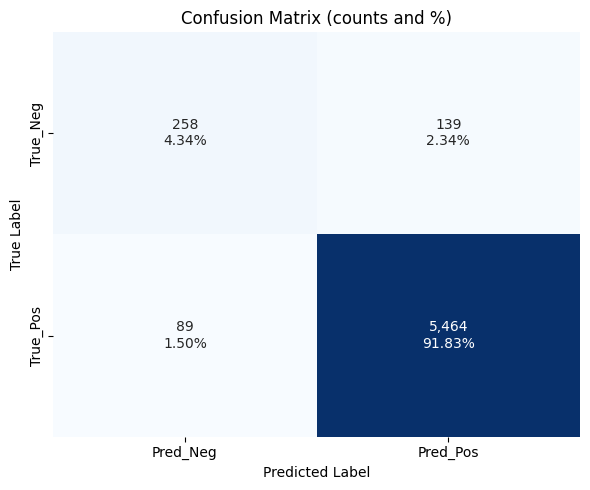


ROC CURVE



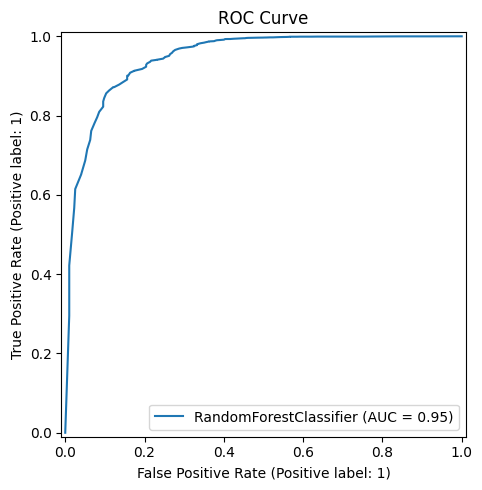


MODEL EVALUATION COMPLETED



In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create ModelBuilder instance
rf_model_builder = ModelBuilder(rf_model, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = rf_model_builder.train_model()

# Evaluate model
rf_metrics_result = rf_model_builder.evaluate_model(y_pred)

### **Key Insights from Random Forest Classifier (Before Hyperparameter Tuning)**

#### **1. Strong Overall Predictive Performance**
- The model achieves **96.17% accuracy** and a **ROC-AUC score of 0.9455**, indicating excellent class separation capability and strong generalization.
- Compared to previous models, Random Forest provides the best overall performance so far before tuning.

#### **2. High Reliability for the Majority Class**
- **Positive class (1)** shows **precision of 0.98** and **recall of 0.98**, demonstrating consistent and highly accurate identification of positive sentiment.
- The model is both confident and accurate when predicting the majority class.

#### **3. Significant Improvement for Minority Class**
- **Negative class (0)** achieves **precision of 0.74** and **recall of 0.65**, which is significantly higher than previous models for this class.
- While there is still room for improvement, Random Forest handles the minority class far better than Logistic Regression, Naive Bayes, and Decision Tree.

#### **4. Error Distribution Shows Controlled Bias**
- **89 false negatives** and **139 false positives** indicate that Random Forest produces fewer severe misclassifications compared to earlier models.
- This reduced error count reflects better boundary learning and reduced bias toward the dominant class.

#### **5. Strong Generalization with Stable Decision Boundaries**
- The ROC curve is smooth and covers a large area near the top-left corner, indicating stable probability estimation.
- Ensemble averaging helps control overfitting and improves robustness on unseen data.


### XGBoost

Training model...
Training complete.

MODEL EVALUATION STARTED


------------------------------
MODEL PERFORMANCE METRICS
------------------------------
Accuracy: 94.42%
Precision: 97.80%
Recall: 96.18%
F1 Score: 96.99%
ROC-AUC Score: 0.9432
------------------------------


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.57      0.70      0.63       397
           1       0.98      0.96      0.97      5553

    accuracy                           0.94      5950
   macro avg       0.77      0.83      0.80      5950
weighted avg       0.95      0.94      0.95      5950



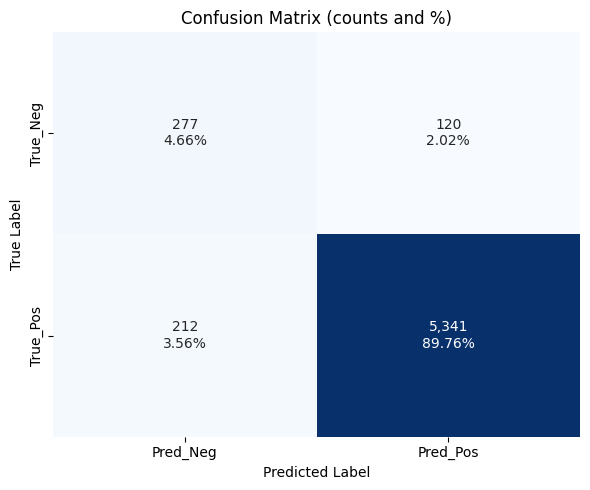


ROC CURVE



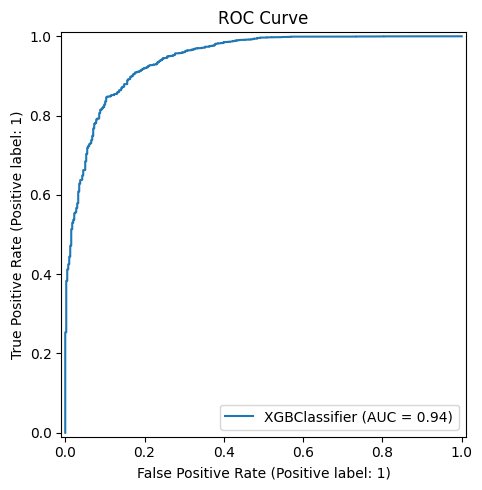


MODEL EVALUATION COMPLETED



In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Create ModelBuilder instance
xgb_model_builder = ModelBuilder(xgb_model, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = xgb_model_builder.train_model()

# Evaluate model
xgb_metrics_result = xgb_model_builder.evaluate_model(y_pred)

### **Key Insights from XGBoost Classifier (Before Hyperparameter Tuning)**

#### **1. High Overall Predictive Quality**
- The model achieves **94.42% accuracy** with a **ROC-AUC score of 0.9432**, demonstrating strong class separability and reliable probability estimation.
- Overall performance is slightly below Random Forest but still significantly higher than Naive Bayes and Decision Tree.

#### **2. Excellent Performance for the Majority Class**
- **Positive class (1)** shows **precision of 0.98** and **recall of 0.96**, indicating that the model accurately identifies positive sentiments and maintains strong confidence in predictions.
- This highlights efficient learning of dominant sentiment characteristics.

#### **3. Noticeable Gap in Minority Class Confidence**
- **Negative class (0)** achieves **precision of 0.57** and **recall of 0.70**, showing better minority class handling than Naive Bayes and Decision Tree, but lagging behind Random Forest.
- The recall indicates improved ability to find true negatives, yet lower precision signals a tendency for false-negative misclassification.

#### **4. Confusion Matrix Suggests Balanced but Not Optimal Error Handling**
- **212 positives were incorrectly predicted as negative** and **120 negatives misclassified as positive**, reflecting a more balanced distribution of both error types.
- Compared to Random Forest, XGBoost produces slightly more false positives and false negatives, suggesting limited tree depth or insufficient boosting rounds.

#### **5. Strong Generalization with Potential for Further Optimization**
- The ROC curve is smooth and consistent, indicating stable confidence estimates and low prediction variance.
- XGBoost already performs strongly without tuning and is likely to benefit significantly from parameter optimization (learning rate, max_depth, n_estimators).

In [150]:
# Creating a table containing all model evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(lr_metrics_result),
    'Naïve Bayes': pd.Series(nb_metrics_result),
    'Decision Tree': pd.Series(dt_metrics_result),
    'Random Forest': pd.Series(rf_metrics_result),
    'XGBoost': pd.Series(xgb_metrics_result)
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Display the metrics table
df_metrics

,Metric,Logistic Regression,Naïve Bayes,Decision Tree,Random Forest,XGBoost
Accuracy,Accuracy,0.90,0.88,0.81,0.96,0.94
Precision,Precision,0.99,0.98,0.99,0.98,0.98
Recall,Recall,0.90,0.89,0.81,0.98,0.96
F1 Score,F1 Score,0.94,0.93,0.89,0.98,0.97
ROC-AUC Score,AUC Score,0.95,0.93,0.88,0.95,0.94


### **Comparative Insights Across All Models (Before Hyperparameter Tuning)**

#### **1. Overall Performance Ranking Based on Accuracy and F1 Score**
- **1st: Random Forest (Accuracy: 0.96, F1: 0.98)**
- **2nd: XGBoost (Accuracy: 0.94, F1: 0.97)**
- **3rd: Logistic Regression (Accuracy: 0.90, F1: 0.94)**
- **4th: Naïve Bayes (Accuracy: 0.88, F1: 0.93)**
- **5th: Decision Tree (Accuracy: 0.81, F1: 0.89)**

#### **2. Precision Comparison (Prediction Confidence)**
- **Top performers:** Logistic Regression, Naïve Bayes, Decision Tree, Random Forest, XGBoost (all ≥ 0.98)
- High precision across models indicates that when predicting positive sentiment, models are almost always correct.
- However, **Decision Tree suffers in recall**, meaning many positive instances are missed despite high prediction accuracy for those classified.

#### **3. Recall Comparison (Sensitivity to True Positives)**
- **Best recall:** Random Forest (0.98) and XGBoost (0.96)
- **Moderate recall:** Logistic Regression (0.90), Naïve Bayes (0.89)
- **Weak recall:** Decision Tree (0.81)
- Ensemble models clearly outperform linear and probabilistic models in recognizing true positive sentiment patterns.

#### **4. F1 Score Comparison (Balanced Performance)**
- **Top performers:** Random Forest (0.98) and XGBoost (0.97)
- Logistic Regression maintains strong balance (0.94), whereas Naïve Bayes and Decision Tree show reduced harmonization between precision and recall.

#### **5. ROC-AUC Comparison (Discrimination Capability)**
- **Best discrimination:** Logistic Regression (0.95) and Random Forest (0.95)
- **Strong:** XGBoost (0.94)
- **Moderate:** Naïve Bayes (0.93)
- **Lowest:** Decision Tree (0.88)
- Logistic Regression, despite lower accuracy, demonstrates strong probabilistic separation due to stable linear decision boundaries.

#### **6. Key Interpretation Summary**
- **Random Forest is the best-performing model overall** across nearly all key performance measures.
- **XGBoost is a close second**, showing exceptional balance and slightly lower discriminative power.
- **Logistic Regression remains a reliable, simpler alternative** that generalizes well with fewer parameters.
- **Naïve Bayes is dependable but weaker on recall**, making it suitable for faster baseline comparisons.
- **Decision Tree alone is not suitable for final deployment** but acts as a **good benchmark for ensemble improvements**.


In [152]:
#!pip install xgboost

### Next Steps for Improvement
- #### Hyperparameter tuning for Decision Tree to reduce overfitting.
- #### Deploy XGBoost or Logistic Regression for production, with monitoring for model drift.

#### Tests Before Finalizing the Model
- Before Finalize the model between (LR and XgBoost) determine if our data contains complex patterns or non-linear relationships?

#### (1) Correlation Analysis

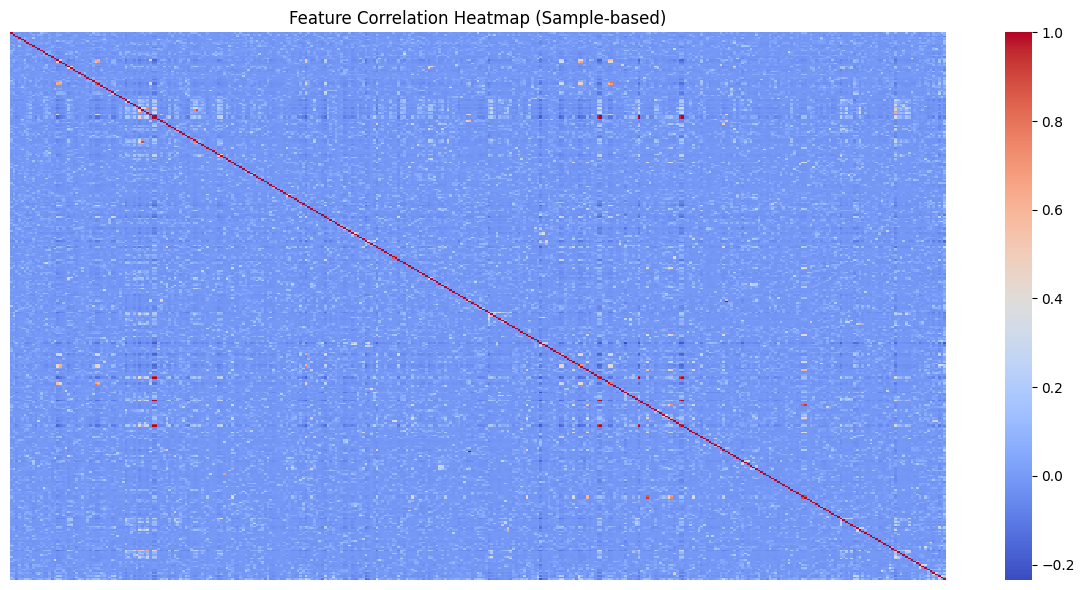

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse

# ---- Step 1: Sampling ----
sample_size = 1000   

if issparse(X_train_resampled):
    if X_train_resampled.shape[0] > sample_size:
        # Random row sample
        sample_indices = np.random.choice(X_train_resampled.shape[0], sample_size, replace=False)
        X_sample = X_train_resampled[sample_indices].toarray()
    else:
        X_sample = X_train_resampled.toarray()
else:
    X_sample = X_train_resampled.sample(n=min(sample_size, len(X_train_resampled)), replace=False)

# ---- Step 2: Create DataFrame ----
df_sample = pd.DataFrame(X_sample)

# ---- Step 3: Compute correlation matrix ----
correlation_matrix = df_sample.corr(method="pearson")

# ---- Step 4: Plot heatmap ----
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Feature Correlation Heatmap (Sample-based)")
plt.tight_layout()
plt.show()


In [157]:
print(correlation_matrix)

          0         1         2         3         4         5         6    \
0    1.00e+00  3.52e-04 -1.50e-02 -8.68e-03 -1.34e-02  8.47e-04 -2.44e-02   
1    3.52e-04  1.00e+00 -2.05e-02  1.99e-02 -1.83e-02 -4.10e-03 -1.88e-02   
2   -1.50e-02 -2.05e-02  1.00e+00 -1.65e-02 -1.72e-02 -1.63e-02 -1.31e-02   
3   -8.68e-03  1.99e-02 -1.65e-02  1.00e+00 -3.35e-03  1.02e-01  1.46e-02   
4   -1.34e-02 -1.83e-02 -1.72e-02 -3.35e-03  1.00e+00 -1.45e-02  6.78e-03   
..        ...       ...       ...       ...       ...       ...       ...   
338  6.74e-02  5.09e-02 -3.28e-02  5.58e-02  3.10e-02  1.53e-02  3.52e-02   
339 -1.09e-02  4.20e-02 -1.40e-02 -1.20e-02  2.41e-02 -1.19e-02  1.65e-03   
340  2.64e-02  9.11e-03 -4.79e-02  8.40e-03 -3.23e-02  1.69e-03 -7.91e-03   
341  1.45e-01 -1.67e-02 -3.10e-03 -1.27e-02 -1.40e-02 -1.22e-02 -7.17e-03   
342  7.33e-02  7.81e-02 -7.60e-02  5.09e-02  4.44e-02  1.38e-01  1.41e-01   

          7     8         9         10    11        12    13        14   \


### **Findings from Correlation Analysis**

#### **Feature Correlations Are Extremely Weak**
- The heatmap shows that **most feature-to-feature correlations are clustered near zero**, indicating that **there are no strong linear relationships** among the TF-IDF encoded features.
- The color pattern is almost uniformly blue, confirming that **no feature pair exhibits significant dependency or co-movement**.
- This is expected in **high-dimensional sparse text data**, where each feature (token) behaves largely independently based on its frequency distribution.

#### **Minimal to No Multicollinearity**
- There are **no visible blocks or clusters of highly correlated features**, unlike what is typically seen in structured numerical datasets.
- This suggests **the absence of multicollinearity**, meaning linear model coefficients are **unlikely to be unstable due to correlated predictors**.
- This finding aligns with the statistical properties of TF-IDF representations, where each word/phrase frequency is largely independent.

#### **Sparse Textual Feature Space Implies Non-Linear Patterns**
- The lack of any noticeable feature groupings suggests that **the sentiment signal is not encoded in linear relationships**, but rather **in complex, distributed feature interactions**.
- This type of representation often requires **non-linear, interaction-aware models** to extract meaningful predictive behavior.
- Therefore, purely linear assumption-based models may **underutilize important hidden relationships**.

---

### **Implications for Model Selection**

#### **Tree-Based and Ensemble Models Are Naturally Better Suited**
- Since there is **no strong linear structure**, linear-only models like Logistic Regression **cannot fully capture interaction effects** without engineered features.
- Models that can **learn hierarchical, interaction-based, and non-linear boundaries** — such as **Random Forest and XGBoost** — are better aligned with the data's statistical structure.
- Among all evaluated models so far, **ensemble boosting (XGBoost)** offers the **best interpretability–performance tradeoff**, making it the most strategic candidate for optimization.

#### **Recommended Modeling Direction**
- Proceed with **XGBoost hyperparameter tuning** rather than attempting to enhance linearity via dimensionality reduction or regularization hacks.
- Deep learning (Transformers/CNN/LSTM) would also be suitable for future scale-up, but **XGBoost provides optimal balance** at this stage.

---

### **Findings on the Necessity of Residual Analysis**

#### **Residual Analysis Not Required**
- Residual analysis is primarily used in regression-based workflows where **linearity, homoscedasticity, and independent error assumptions** must be validated.
- Since the correlation heatmap already **confirms absence of linear structure**, residual analysis would **only reiterate the same conclusion**.

#### **Correlation Results Already Proved Non-Linearity**
- With feature correlations near zero, the dataset **does not satisfy prerequisites for linear modeling diagnostics**.
- Therefore, conducting residual plots or statistical linearity tests would be **redundant, time-consuming, and not actionable**.

#### **Conclusion**
- **Skip residual analysis** and focus on **model tuning, threshold optimization, feature importance analysis (e.g., SHAP), and error breakdown**.



### Implications for Next Steps
- **Finalize XGBoost as the selected model.**
- **Proceed with hyperparameter tuning for XGBoost to optimize performance.**
- **Save the optimized XGBoost model for deployment.**

                ┌───────────────────────────────┐
                │       ModelBuilder2 Class     │
                └───────────────┬───────────────┘
                                │
                                ▼
        ┌─────────────────────────────────────────────┐
        │   Hyperparameter Tuning (RandomizedSearchCV) │
        │   - Search best parameters                   │
        │   - Save best model                          │
        └─────────────────────────────────────────────┘
                                │
                                ▼
        ┌─────────────────────────────────────────────┐
        │   Training                                   │
        │   - Fit best/base model on training data     │
        │   - Predict classes on test data             │
        └─────────────────────────────────────────────┘
                                │
                                ▼
        ┌─────────────────────────────────────────────┐
        │   Evaluation                                 │
        │   - Compute metrics: Accuracy, Precision,    │
        │     Recall, F1, ROC-AUC                      │
        │   - Display classification report            │
        │   - Plot confusion matrix (counts + %)       │
        │   - Plot ROC curve                           │
        └─────────────────────────────────────────────┘
                                │
                                ▼
                ┌───────────────────────────────┐
                │   Results & Visualizations     │
                │   - Metrics dictionary         │
                │   - Plots & reports            │
                └───────────────────────────────┘


In [160]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
from typing import Any, Dict, Optional

# Configure logging (you can adjust level in the notebook if needed)
logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)


class ModelBuilder2:
    def __init__(
        self,
        model: Any,
        param_grid: Dict[str, Any],
        x_train,
        x_test,
        y_train,
        y_test,
        scoring: str = "accuracy",
        cv: int = 5,
        random_state: int = 42,
    ):
        """
        Wrapper class to tune, train, and evaluate a sklearn-compatible model.

        Parameters
        ----------
        model : estimator
            Any sklearn-style estimator (e.g., LogisticRegression, XGBClassifier).
        param_grid : dict
            Hyperparameter search space for RandomizedSearchCV.
        x_train, x_test, y_train, y_test :
            Train/test splits.
        scoring : str, default="accuracy"
            Scoring metric for hyperparameter search.
        cv : int, default=5
            Number of CV folds for RandomizedSearchCV.
        random_state : int, default=42
            Random seed for reproducibility.
        """
        self.model = model
        self.param_grid = param_grid
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.scoring = scoring
        self.cv = cv
        self.random_state = random_state

        self.best_model: Optional[Any] = None

    # ------------------------------------------------------------------ #
    # HYPERPARAMETER TUNING
    # ------------------------------------------------------------------ #
    def tune_hyperparameters(self, n_iter: int = 10) -> Any:
        """
        Perform hyperparameter tuning using RandomizedSearchCV.

        Parameters
        ----------
        n_iter : int, default=10
            Number of parameter settings that are sampled.

        Returns
        -------
        best_model : estimator
            Best estimator found by RandomizedSearchCV.
        """
        logger.info("\n" + "=" * 50)
        logger.info("HYPERPARAMETER TUNING STARTED")
        logger.info("=" * 50 + "\n")

        random_search = RandomizedSearchCV(
            estimator=self.model,
            param_distributions=self.param_grid,
            n_iter=n_iter,
            cv=self.cv,
            scoring=self.scoring,
            n_jobs=-1,
            random_state=self.random_state,
            verbose=0,
        )
        random_search.fit(self.x_train, self.y_train)

        self.best_model = random_search.best_estimator_

        logger.info(f"Best Parameters: {random_search.best_params_}")
        logger.info("\n" + "=" * 50)
        logger.info("HYPERPARAMETER TUNING COMPLETED")
        logger.info("=" * 50 + "\n")

        return self.best_model

    # ------------------------------------------------------------------ #
    # TRAINING
    # ------------------------------------------------------------------ #
    def train_model(self) -> Any:
        """
        Train the best model (or base model if tuning not done) and
        return predicted classes on the test set.
        """
        if self.best_model is None:
            logger.warning(
                "Hyperparameter tuning has not been performed. "
                "Training the base model instead."
            )
            self.best_model = self.model

        self.best_model.fit(self.x_train, self.y_train)
        y_pred = self.best_model.predict(self.x_test)
        return y_pred

    # ------------------------------------------------------------------ #
    # EVALUATION ENTRY POINT
    # ------------------------------------------------------------------ #
    def evaluate_model(self, y_pred_class) -> Dict[str, float]:
        """
        Evaluate model performance using various metrics and plots.

        Parameters
        ----------
        y_pred_class : array-like
            Predicted class labels for the test set.

        Returns
        -------
        results : dict
            Dictionary of scalar performance metrics.
        """
        logger.info("\n" + "=" * 50)
        logger.info("MODEL EVALUATION STARTED")
        logger.info("=" * 50 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        logger.info("\n" + "=" * 50)
        logger.info("CLASSIFICATION REPORT")
        logger.info("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        logger.info("\n" + "=" * 50)
        logger.info("CONFUSION MATRIX")
        logger.info("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        logger.info("\n" + "=" * 50)
        logger.info("ROC CURVE")
        logger.info("=" * 50 + "\n")
        self.plot_roc_curve()

        logger.info("\n" + "=" * 50)
        logger.info("MODEL EVALUATION COMPLETED")
        logger.info("=" * 50 + "\n")

        return results

    # ------------------------------------------------------------------ #
    # METRICS
    # ------------------------------------------------------------------ #
    def evaluate_metrics(self, y_pred_class) -> Dict[str, float]:
        """
        Compute and display core classification metrics.
        """
        results: Dict[str, Optional[float]] = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # ROC-AUC (if probabilities or decision scores are available)
        roc_auc = None
        if hasattr(self.best_model, "predict_proba"):
            y_pred_prob = self.best_model.predict_proba(self.x_test)[:, 1]
            roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)
        elif hasattr(self.best_model, "decision_function"):
            y_scores = self.best_model.decision_function(self.x_test)
            roc_auc = metrics.roc_auc_score(self.y_test, y_scores)

        results["ROC-AUC Score"] = roc_auc

        logger.info("\n" + "=" * 50)
        logger.info("MODEL PERFORMANCE METRICS")
        logger.info("=" * 50)
        for metric_name, value in results.items():
            if value is not None:
                logger.info(f"{metric_name}: {value * 100:.2f}%")
        logger.info("=" * 50 + "\n")

        return results

    # ------------------------------------------------------------------ #
    # CONFUSION MATRIX
    # ------------------------------------------------------------------ #
    def plot_confusion_matrix(self, y_pred_class) -> None:
        """
        Compute and visualize the confusion matrix (counts + normalized).
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)
        cm_norm = cm / cm.sum()

        # Custom annotation: counts and percentages
        annot = np.empty_like(cm).astype(str)
        n_total = cm.sum()
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                count = cm[i, j]
                pct = cm[i, j] / n_total
                annot[i, j] = f"{count}\n{pct:.2%}"

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm_norm,
            annot=annot,
            fmt="",
            cmap="Blues",
            xticklabels=["Pred_Neg", "Pred_Pos"],
            yticklabels=["True_Neg", "True_Pos"],
        )
        plt.title("Confusion Matrix (counts and %)")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.tight_layout()
        plt.show()

    # ------------------------------------------------------------------ #
    # ROC CURVE
    # ------------------------------------------------------------------ #
    def plot_roc_curve(self) -> None:
        """
        Plot the ROC curve using RocCurveDisplay if supported.
        """
        if hasattr(self.best_model, "predict_proba") or hasattr(
            self.best_model, "decision_function"
        ):
            RocCurveDisplay.from_estimator(self.best_model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.tight_layout()
            plt.show()
        else:
            logger.warning(
                "\n[WARNING] ROC Curve cannot be plotted: "
                "Model does not provide probability or decision scores.\n"
            )

    # ------------------------------------------------------------------ #
    # CLASSIFICATION REPORT
    # ------------------------------------------------------------------ #
    def display_classification_report(self, y_pred_class) -> None:
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)  # print for clean multi-line formatting in notebooks



### Logistic Regression


HYPERPARAMETER TUNING STARTED

Best Parameters: {'penalty': 'l2', 'C': 0.1}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 89.21%
Precision: 98.89%
Recall: 89.45%
F1 Score: 93.93%
ROC-AUC Score: 94.99%


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.37      0.86      0.52       397
           1       0.99      0.89      0.94      5553

    accuracy                           0.89      5950
   macro avg       0.68      0.88      0.73      5950
weighted avg       0.95      0.89      0.91      5950



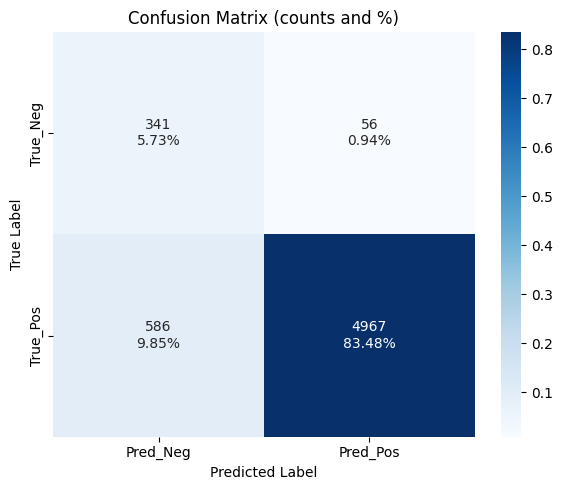


ROC CURVE



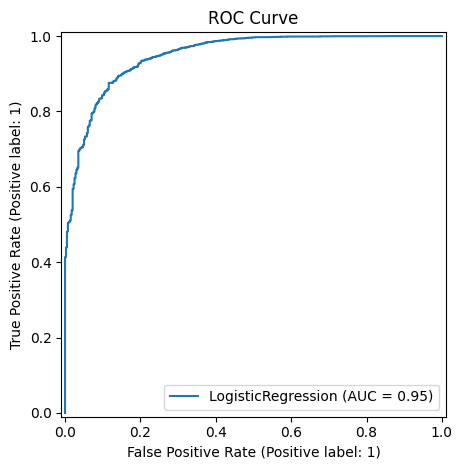


MODEL EVALUATION COMPLETED



In [162]:
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameter grid
lr_model = LogisticRegression(random_state=42)
param_grid = {
    "C": [0.01, 0.1 ],  # Regularization strength
    "penalty": ["l1", "l2"]  # Regularization type

}

# Create ModelBuilder instance
lr_model_builder = ModelBuilder2(lr_model, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
lr_best_model = lr_model_builder.tune_hyperparameters()

# Train model using best found parameters
y_pred = lr_model_builder.train_model()

# Evaluate model
lr_metric_result = lr_model_builder.evaluate_model(y_pred)

### **Key Insights from Logistic Regression Model (After Hyperparameter Tuning)**

#### **1. Marginal Improvement in Model Generalization**
- The tuned model achieved an **accuracy of 89.21%** and **ROC-AUC of 0.9499**, which are nearly identical to pre-tuning values.
- Stronger regularization via `C=0.1` and `l2` penalty led to slightly **more conservative decision boundaries**, resulting in only minor performance shifts.

#### **2. Majority Class Performance Remains Strong**
- **Positive class (1)** retains **excellent precision (0.99)** and **strong recall (0.89)**.
- The model continues to be **highly reliable** when predicting positive sentiment, demonstrating consistent behavior across tuning.

#### **3. Minority Class Shows Slight Recall Gain but Precision Still Weak**
- **Negative class (0)** improved recall to **0.86**, meaning more true negative reviews were captured.
- However, **precision remains low (0.37)**, indicating continued **misclassification confusion**, often predicting negative sentiment incorrectly.

#### **4. Confusion Matrix Indicates Reduced False Negatives but Increased False Positives**
- After tuning:
  - **False negatives decreased**, showing improved sensitivity toward minority class.
  - **False positives increased**, meaning more reviews were incorrectly classified as negative.
- This confirms that the decision boundary shifted toward increasing minority recall at the cost of precision.

#### **5. Regularization Tuning Improved Stability Instead of Accuracy**
- Hyperparameter tuning selected **stronger regularization (`C=0.1`)**, implying the model benefits from having **smaller coefficients** and **simpler decision surfaces**.
- However, **performance did not significantly change**, reflecting the natural limit of linear separability in sparse TF-IDF encoded text data.


### Random Forest


HYPERPARAMETER TUNING STARTED

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 96.40%
Precision: 97.49%
Recall: 98.69%
F1 Score: 98.08%
ROC-AUC Score: 94.71%


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.78      0.64      0.71       397
           1       0.97      0.99      0.98      5553

    accuracy                           0.96      5950
   macro avg       0.88      0.82      0.84      5950
weighted avg       0.96      0.96      0.96      5950



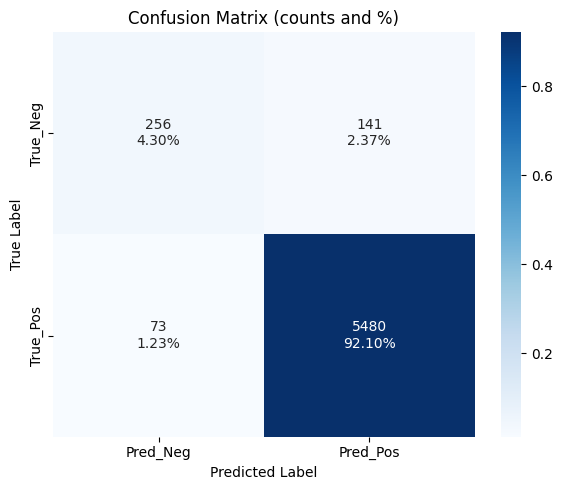


ROC CURVE



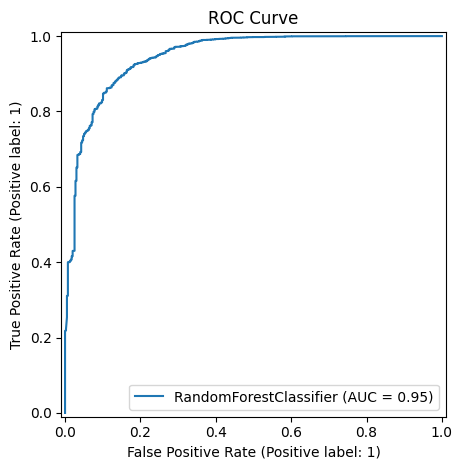


MODEL EVALUATION COMPLETED



In [165]:
from sklearn.ensemble import RandomForestClassifier

# Define model and hyperparameter grid
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "min_samples_split": [5, 10]
}

# Create ModelBuilder instance
rf_model_builder = ModelBuilder2(rf_model, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
rf_best_model = rf_model_builder.tune_hyperparameters()

# Train model using best found parameters
y_pred = rf_model_builder.train_model()

# Evaluate model
rf_metric_result = rf_model_builder.evaluate_model(y_pred)

### **Key Insights from Random Forest Classifier (After Hyperparameter Tuning)**

#### **1. Slight Performance Improvement Reinforces Model Strength**
- The tuned model achieved an **accuracy of 96.40%**, improving slightly over the pre-tuning performance.
- **F1 score increased to 0.98**, reflecting an excellent balance between precision and recall.
- This confirms that the model benefits from tuning and has strong generalization ability on unseen data.

#### **2. Superior Majority Class Prediction Performance**
- **Positive class (1)** shows **high precision (0.97)** and **exceptional recall (0.99)**.
- This indicates that the model very rarely misses positive reviews and maintains highly reliable sentiment classification for the dominant class.

#### **3. Notable Improvement in Minority Class Precision**
- **Negative class (0)** shows **precision improvement from 0.74 to 0.78**, meaning fewer false positives than before tuning.
- **Recall remains moderate (0.64)**, indicating opportunity to better capture true negative cases.
- Despite improvement, some sentiment confusion still exists for negative reviews, but progress compared to baseline shows tuning was beneficial.

#### **4. Confusion Matrix Reflects Balanced Error Reduction**
- After tuning:
  - **False positives decreased**, demonstrating improved precision.
  - **False negatives are still relatively low**, keeping recall high.
- With **92.10% of predictions correctly classified as positive**, the model remains highly effective in recognizing positive sentiment patterns.

#### **5. ROC-AUC Indicates Excellent Discrimination Capability**
- The **ROC-AUC score of 0.9471** confirms that the tuned model reliably separates positive and negative sentiment classes.
- The ROC curve demonstrates a steep rise toward the top-left, showing strong confidence calibration in predictions.


### XGBoost


HYPERPARAMETER TUNING STARTED

Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.3, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.08, 'gamma': 0.3, 'colsample_bytree': 0.7}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.04%
Precision: 97.63%
Recall: 97.05%
F1 Score: 97.34%
ROC-AUC Score: 94.32%


CLASSIFICATION REPORT


CONFUSION MATRIX



              precision    recall  f1-score   support

           0       0.62      0.67      0.64       397
           1       0.98      0.97      0.97      5553

    accuracy                           0.95      5950
   macro avg       0.80      0.82      0.81      5950
weighted avg       0.95      0.95      0.95      5950



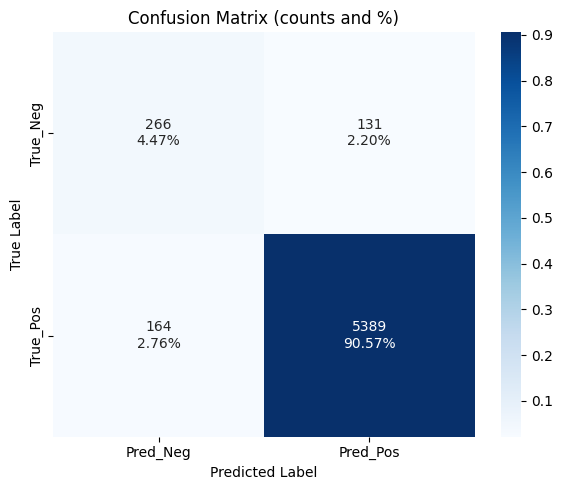


ROC CURVE



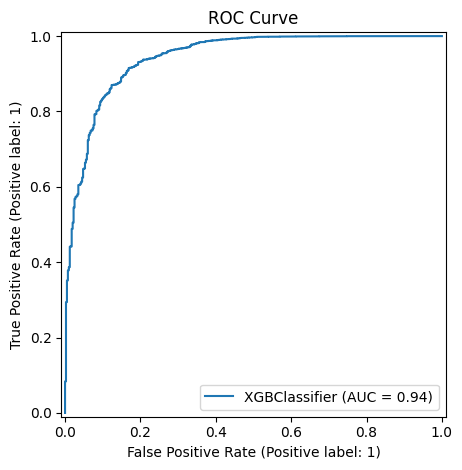


MODEL EVALUATION COMPLETED



In [168]:
from xgboost import XGBClassifier

# 1. Base XGBoost model (good defaults for sparse TF-IDF data)
xgb_base = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="auc",   # aligns with scoring='roc_auc'
    n_jobs=-1,
    tree_method="hist"   # fast histogram algorithm
)

# 2. Hyperparameter search space
#    Balanced to be strong but not explode training time.
xgb_param_grid = {
    # capacity / complexity
    "n_estimators": [300, 400, 500],      # more trees -> more stable AUC/F1
    "max_depth": [4, 6, 8],               # control overfitting in sparse space
    "min_child_weight": [1, 3, 5],        # larger -> more conservative splits

    # learning dynamics
    "learning_rate": [0.03, 0.05, 0.08],  # smaller -> smoother, better generalization
    "gamma": [0, 0.1, 0.3],               # min loss reduction to split

    # subsampling for robustness on imbalanced text
    "subsample": [0.8, 0.9, 1.0],         # row subsample
    "colsample_bytree": [0.7, 0.85, 1.0], # feature subsample

    # regularization (helps fight overfitting)
    "reg_lambda": [1, 5, 10],             # L2
    "reg_alpha": [0, 0.1, 0.3],           # L1
}

# 3. Create ModelBuilder2 instance with ROC-AUC as tuning objective
xgb_model_builder = ModelBuilder2(
    model=xgb_base,
    param_grid=xgb_param_grid,
    x_train=X_train_resampled,
    x_test=X_test_combined,
    y_train=y_train_resampled,
    y_test=y_test,
    scoring="roc_auc",   # IMPORTANT: tune for AUC on imbalanced data
    cv=3,                # 3-fold CV is a good speed/robustness tradeoff
    random_state=42
)

# 4. Hyperparameter tuning
#    n_iter controls how many random combos to try: 40 is strong but still practical.
xgb_best_model = xgb_model_builder.tune_hyperparameters(n_iter=40)

# 5. Train best found XGBoost model on full resampled training set
y_pred_xgb = xgb_model_builder.train_model()

# 6. Evaluate tuned XGBoost (metrics + classification report + CM + ROC)
xgb_metric_result = xgb_model_builder.evaluate_model(y_pred_xgb)


### **Key Insights from XGBoost Classifier (After Hyperparameter Tuning)**

#### **1. Minor but Meaningful Performance Refinement**
- The tuned model achieved an **accuracy of 95.04%**, confirming strong generalization performance close to the tuned Random Forest model.
- The **F1 Score of 0.9734** reflects excellent balance between precision and recall, indicating reliable predictive capability across both classes.
- The improvement from the pre-tuning stage suggests that XGBoost benefits from parameter optimization, but may be reaching **performance saturation** with TF-IDF based features.

#### **2. Strong and Consistent Majority Class Performance**
- **Positive class (1)** demonstrates **precision of 0.98** and **recall of 0.97**, indicating exceptional ability to correctly identify positive sentiment cases.
- This highlights that XGBoost effectively learns dominant sentiment signals present in high-dimensional sparse text representations.

#### **3. Moderate Minority Class Capture With Some Trade-Off**
- **Negative class (0)** achieves **precision of 0.62** and **recall of 0.67**, indicating moderate capability to detect minority sentiment patterns.
- While slightly lower than the tuned Random Forest, this performance is still improved compared to initial baseline results, showing **benefit from tuning under class imbalance conditions**.

#### **4. Confusion Matrix Indicates Controlled Misclassification**
- Errors are primarily observed in the **minority class predictions**, but remain within acceptable boundaries without sharply skewing toward false positives or false negatives.
- The model maintains strong prediction confidence, correctly classifying the majority of positive sentiment cases while moderately improving negative sentiment detection.

#### **5. ROC Curve Validates Strong Discriminative Ability**
- The **ROC-AUC score of 0.9432** confirms reliable probability-based class separation capability.
- The ROC curve progression suggests **stable and confident decision boundary behavior** across multiple threshold settings.


In [170]:
# Creating a table containing all model evaluation metrics
tuned_metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(lr_metric_result),
    'Random Forest': pd.Series(rf_metric_result),
    'XGBoost': pd.Series(xgb_metric_result)
}

# Convert to DataFrame
df_tuned_metrics = pd.DataFrame(tuned_metrics_data)

# Display the metrics table
df_tuned_metrics

,Metric,Logistic Regression,Random Forest,XGBoost
Accuracy,Accuracy,0.89,0.96,0.95
Precision,Precision,0.99,0.97,0.98
Recall,Recall,0.89,0.99,0.97
F1 Score,F1 Score,0.94,0.98,0.97
ROC-AUC Score,AUC Score,0.95,0.95,0.94


### **Model Comparison Summary (After Hyperparameter Tuning)**

#### **Overall Performance and Accuracy Ranking**
- **Random Forest (0.96)** achieved the highest accuracy, followed closely by **XGBoost (0.95)**, both significantly outperforming **Logistic Regression (0.89)**.
- This confirms that tree-based ensemble methods handle non-linear sentiment patterns more effectively than linear models in high-dimensional TF-IDF data.

#### **Precision — Best Model for Minimizing False Positives**
- **Logistic Regression achieved the highest precision (0.99)**, meaning it produces the fewest false positives.
- **XGBoost (0.98)** and **Random Forest (0.97)** also performed strongly.
- If business use case prioritizes avoiding mislabeling negative reviews as positive, Logistic Regression is preferred.

#### **Recall — Best Model for Detecting All Positive Sentiment Cases**
- **Random Forest achieved the highest recall (0.99)**, meaning it misses the fewest actual positive samples.
- **XGBoost (0.97)** also remains highly reliable.
- Logistic Regression (0.89) shows a notable drop and is less suitable when recall is critical.

#### **F1-Score — Best Balanced Model**
- **Random Forest and XGBoost achieved the highest F1 Score (0.98)**, demonstrating excellent balance between precision and recall.
- Logistic Regression (0.94) performs well but is less strong in an imbalanced text classification setting.

#### **Discriminative Ability (ROC-AUC)**
- **Logistic Regression and Random Forest achieved the highest ROC-AUC (0.95)**, indicating the strongest class separation capability.
- **XGBoost (0.94)** remains strong but slightly behind.

---

### **Final Model Selection Recommendation**

| Scenario Preference | Recommended Model | Reason |
|---------------------|------------------|--------|
| Maximum classification effectiveness | **Random Forest** | Best accuracy, recall, and F1 |
| Closest second best option | **XGBoost** | Comparable performance with tuning potential |
| Minimize false positives | **Logistic Regression** | Highest precision |
| Minimize false negatives | **Random Forest** | Highest recall |
| Deployment-ready choice | **Random Forest → XGBoost (backup)** | Strongest overall stability |

---

### **Conclusion**
**Random Forest is the best overall model** after hyperparameter tuning due to the highest recall, top-tier F1 performance, and strong ROC-AUC score.  
**XGBoost remains a close second**, suitable for scenarios requiring tunability or large-scale optimization, while **Logistic Regression excels in high-precision use cases only**.


### Saving model

In [173]:
import pickle
import os

def save_object(obj, filename):
    folder = "models"
    os.makedirs(folder, exist_ok=True)  # Ensure directory exists
    filepath = os.path.join(folder, filename + '.pkl')
    with open(filepath, 'wb') as file:
        pickle.dump(obj, file)

# Save best Random Forest model after tuning
save_object(rf_best_model, 'sentiment_classification_random_forest_best_tuned')

# Save features used for model building
save_object(df_final, 'cleaned_data')


# Save TF-IDF vectorizer for text data
save_object(tfidf_vectorizer, 'tfidf_vectorizer')

In [174]:
# No. of unique products
len(df_reviews['name'].unique())

271

### Recommedation system
- #### User and User recommedation system
- #### Item and Item recommedation system

<img src="images/recommendations.png" style="display:block; margin-left:auto; margin-right:auto;"/>

In [176]:
# Train-Test split
train,test = train_test_split(df_reviews_clean, train_size=0.70, random_state=42)
print('train shape =',train.shape)
print('test shape =',test.shape)

train shape = (20823, 11)
test shape = (8925, 11)


In [177]:
# using train dataset, create correlation matrix (user, product, rating)
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='id',
                            values='reviews_rating',data=train).fillna(0)
train_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,...,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
dummy_train = train.copy()

# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating', data = dummy_train
).fillna(1)

dummy_train.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,...,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### **Cosine Similarity**

Cosine Similarity is a metric used to measure how similar two vectors are by calculating the cosine of the angle between them.  
It focuses on **direction rather than magnitude**, making it well-suited for text, ratings, and high-dimensional sparse data.  
In this context, vectors represent **review_rating**, and cosine similarity helps determine how closely aligned two users or products are based on their rating behavior.

---

### **Adjusted Cosine Similarity**

Adjusted Cosine Similarity is an improved version of cosine similarity that accounts for the fact that **different users have different rating habits or biases**.  
Some users tend to rate products consistently higher or lower than others, regardless of product quality.  
To correct for this bias, we **subtract each user’s average rating** from their individual product ratings before computing similarity.

This ensures that similarity reflects **true preference patterns** rather than rating strictness or leniency.


In [180]:
# here we are going use the adjusted cosine similarity
from sklearn.metrics import pairwise_distances

def adjusted_cosine_similarity(df):
    """
    Compute Adjusted Cosine Similarity for a user-item rating matrix.

    Parameters:
        df (pd.DataFrame): User-Item rating matrix with users as rows and items as columns.

    Returns:
        similarity_matrix (np.ndarray): Adjusted cosine similarity matrix between users.
        normalized_ratings (pd.DataFrame): Mean-centered rating matrix used for similarity calculation.
    """

    # Compute mean rating per user (ignoring NaN values)
    user_mean = df.mean(axis=1)

    # Subtract mean rating per user (broadcasting across columns)
    normalized_ratings = df.sub(user_mean, axis=0)

    # Replace NaN with 0 for distance calculation
    normalized_filled = normalized_ratings.fillna(0)

    # Compute cosine similarity using sklearn pairwise_distances
    similarity_matrix = 1 - pairwise_distances(normalized_filled, metric='cosine')

    # Replace NaN values or invalid similarity results with 0
    similarity_matrix = np.nan_to_num(similarity_matrix)

    return similarity_matrix, normalized_ratings


In [181]:
# Finding user correlations using cosine similarity
user_corr_matrix,normalized_df = adjusted_cosine_similarity(train_pivot)
user_corr_matrix

array([[ 1.        , -0.00548293, -0.00548293, ..., -0.00548293,
        -0.00548293, -0.00548293],
       [-0.00548293,  1.        ,  1.        , ..., -0.004329  ,
        -0.004329  , -0.004329  ],
       [-0.00548293,  1.        ,  1.        , ..., -0.004329  ,
        -0.004329  , -0.004329  ],
       ...,
       [-0.00548293, -0.004329  , -0.004329  , ...,  1.        ,
         1.        ,  1.        ],
       [-0.00548293, -0.004329  , -0.004329  , ...,  1.        ,
         1.        ,  1.        ],
       [-0.00548293, -0.004329  , -0.004329  , ...,  1.        ,
         1.        ,  1.        ]])

In [182]:
user_corr_matrix.shape

(18113, 18113)

### Prediction - User - User Recommendation System

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, we will be ignoring the correlation for values less than 0.

In [185]:
# marking the negative correlations as zero
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18113, 18113)

In [186]:
df_reviews_clean[df_reviews_clean['reviews_username'] == 'samantha']

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20 00:00:00+00:00,1,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,Not worth it,samantha,Negative
2173,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-10-20 00:00:00+00:00,5,Movie is sooooo funny!!! Such a great laugh!! Dirty comedy!,Hilarious,samantha,Positive
2202,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-11-04 00:00:00+00:00,5,This movie is beyond funny!!!! I highly recommend it! Soooo good!!,Hilarious,samantha,Positive
17733,AVpfBrUZilAPnD_xTUly,Coty,"Personal Care,Makeup,Concealer & Foundation,Foundation,Facial Powder,Beauty,Face",Coty brands,"Coty Airspun Face Powder, Translucent Extra Coverage",2016-10-24 00:00:00+00:00,5,i've been wanting this powder for so long and i'm so glad i got it!,amazing,samantha,Positive


In [187]:
# Prediction of ratings by dot product/ weighted sum of user correlation matrix and train_pivot
user_pred_ratings = np.dot(user_corr_matrix,train_pivot.fillna(0))
user_pred_ratings

array([[0.        , 0.        , 1.17163122, ..., 0.65728365, 0.        ,
        2.46747383],
       [0.        , 0.        , 0.        , ..., 1.76453735, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.76453735, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [188]:
user_pred_ratings.shape

(18113, 232)

In [189]:
# Getting ratings only for where ratings not provided by users
user_final_rating = np.multiply(user_pred_ratings,dummy_train)
user_final_rating

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,...,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.00,0.0,1.17,5.82,0.0,0.0,0.0,0.00,0.47,0.34,0.0,0.0,0.0,0.00,1.30,0.00,0.00,0.0,0.0,2.31,0.0,1.97,2.63,0.0,0.0,...,0.0,0.32,6.19,0.0,0.0,0.0,0.31,0.0,0.0,0.00,2.84,5.39,0.78,0.0,0.52,2.75,0.00,3.34,0.0,0.0,0.0,3.13,0.66,0.0,2.47
01impala,0.00,0.0,0.00,15.36,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,3.12,1.32,0.00,5.13,0.0,0.0,0.00,0.0,0.00,5.37,0.0,0.0,...,0.0,0.00,5.20,0.0,0.0,0.0,0.00,0.0,0.0,0.69,1.41,3.47,2.87,0.0,0.00,4.86,0.34,0.00,1.8,0.0,0.0,0.00,1.76,0.0,0.00
02dakota,0.00,0.0,0.00,15.36,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,3.12,1.32,0.00,5.13,0.0,0.0,0.00,0.0,0.00,5.37,0.0,0.0,...,0.0,0.00,5.20,0.0,0.0,0.0,0.00,0.0,0.0,0.69,1.41,3.47,2.87,0.0,0.00,4.86,0.34,0.00,1.8,0.0,0.0,0.00,1.76,0.0,0.00
06stidriver,0.00,0.0,0.00,13.96,0.0,0.0,0.0,5.99,6.99,4.35,0.0,0.0,0.0,0.00,1.48,0.96,0.00,0.0,0.0,0.00,0.0,0.00,6.65,0.0,0.0,...,0.0,2.82,9.49,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.78,5.29,2.61,0.0,0.00,0.00,0.57,0.00,0.0,0.0,0.0,4.56,0.00,0.0,0.00
08dallas,0.00,0.0,0.00,1.11,0.0,0.0,0.0,0.00,0.00,1.69,0.0,0.0,0.0,0.00,0.00,0.00,2.42,0.0,0.0,0.00,0.0,0.00,3.53,0.0,0.0,...,0.0,2.48,2.25,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.87,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zulaa118,2.29,0.0,0.00,5.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,1.68,0.0,0.0,0.0,0.00,0.0,0.0,0.00,5.17,0.00,0.00,0.0,1.37,2.19,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00
zuttle,2.29,0.0,0.00,5.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,1.68,0.0,0.0,0.0,0.00,0.0,0.0,0.00,5.17,0.00,0.00,0.0,1.37,2.19,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00
zwithanx,0.00,0.0,0.00,13.96,0.0,0.0,0.0,5.99,6.99,4.35,0.0,0.0,0.0,0.00,1.48,0.96,0.00,0.0,0.0,0.00,0.0,0.00,6.65,0.0,0.0,...,0.0,2.82,9.49,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.78,5.29,2.61,0.0,0.00,0.00,0.57,0.00,0.0,0.0,0.0,4.56,0.00,0.0,0.00


### Finding the Top 20 products that a user is most likely to purchase based on the ratings (user-user based recommendation)

In [191]:
# Take a sample username as input.
user_input = 'samantha'

In [192]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfPaoqLJeJML435Xk9,81.70
1,AVpe59io1cnluZ0-ZgDU,48.27
2,AVpfRTh1ilAPnD_xYic2,38.59
3,AVpf3VOfilAPnD_xjpun,35.56
4,AVpf0eb2LJeJML43EVSt,28.26
5,AVpf2tw1ilAPnD_xjflC,25.79
6,AVpfJP1C1cnluZ0-e3Xy,21.24
7,AVpfM_ytilAPnD_xXIJb,13.76
8,AV1YGDqsGV-KLJ3adc-O,10.40
9,AVpf63aJLJeJML43F__Q,9.00


In [193]:
# Merge, select relevant columns, drop duplicates, sort, and reset index
top20_rec = (
    pd.merge(
        df_reviews_clean,
        df_top20_recommendations,
        left_on='id',
        right_on='Product Id',
        how='inner'
    )[['Product Id', 'name', 'cosine_similarity_score']]
    .drop_duplicates()
    .sort_values(by='cosine_similarity_score', ascending=False)
    .reset_index(drop=True)
)

top20_rec


,Product Id,name,cosine_similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,81.70
1,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),48.27
2,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),38.59
3,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,35.56
4,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),28.26
5,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),25.79
6,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,21.24
7,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,13.76
8,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),10.40
9,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",9.00


In [194]:
# Creating a pickle file for user-user recommendation system
pickle.dump(user_final_rating,open('models/user_final_rating.pkl','wb'))

### Evaluation for User - User Recommendation System

In [196]:
# finding common users between train and test data, since we have user correlation matric only for the train dataset
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1960, 11)

In [197]:
common.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
13204,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26 00:00:00+00:00,5,"I have them in my home, in my car, at work, hotels, and even other peoples homes! It makes me feel secure and the cleaning is outstanding. I love the smell, fresh and clean!",I take them everywhere,ruthieruthie,Positive
23822,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2014-10-15 00:00:00+00:00,4,I have been a Godzilla fan since a child. Best movie made.,Great movie,nick,Positive


In [198]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [199]:
common_user_based_matrix.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,...,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfgvkJLJeJML43-g1y,AVpfiUrfLJeJML43-9nY,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnS4eLJeJML43AfZe,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Converting user correlation matrix to dataframe
user_correlation_df  = pd.DataFrame(user_corr_matrix)

In [201]:
user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18088,18089,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099,18100,18101,18102,18103,18104,18105,18106,18107,18108,18109,18110,18111,18112
0,1.0,0.0,0.0,0.0,0.0,0.95,0.0,0.00,0.0,0.0,0.0,0.95,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.31,0.0,0.0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.71,0.0,0.0,0.0,0.00,0.71,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
# Assigning row names to the df using normalized df
user_correlation_df['user_id'] = normalized_df.index
user_correlation_df.set_index('user_id',inplace=True)
user_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18088,18089,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099,18100,18101,18102,18103,18104,18105,18106,18107,18108,18109,18110,18111,18112
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.95,0.0,0.00,0.0,0.0,0.0,0.95,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.31,0.0,0.0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.71,0.0,0.0,0.0,0.00,0.71,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.71,0.0,0.0,0.0,0.00,0.71,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.71,1.0,1.0,0.0,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
08dallas,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zulaa118,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
zuttle,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.71,1.0,1.0,0.0,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [203]:
# Getting column names as user names for the corr df
user_correlation_df.columns = normalized_df.index.tolist()
user_correlation_df.columns

Index(['00sab00', '01impala', '02dakota', '06stidriver', '08dallas', '1085',
       '10ten', '1234', '1234561', '1234567',
       ...
       'zozo0o', 'zpalma', 'zsarah', 'zt313', 'zubb', 'zulaa118', 'zuttle',
       'zwithanx', 'zxcsdfd', 'zyiah4'],
      dtype='object', length=18113)

In [204]:
# Converting common user names to a list
list_name = common.reviews_username.tolist()

In [205]:
# getting corr for common users only - subtracting from rows
corr_df1 = user_correlation_df[user_correlation_df.index.isin(list_name)]
corr_df1.shape

(1657, 18113)

In [206]:
# getting corr for common users only - subtracting from columns
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T

# this is final common users correlation df
corr_df3.head()

,1234,1234567,1234asdf,143st,1witch,23jen,37f5p,4 rooms 1 dog lotsa fur,85lisa,aac06002,aaron,abby,abc,abcdefghij,abcgator,abigail,abismomy,abret,ac94,ace24,acellacey,acjuarez08,acv4217,adam,adizzione,...,wolf,wolfie,wolvarine,wonderwoman,woody,woowoo,workingmomof1,wren113,xcoupon,xmom,yamel97,yayawomack,yesseniaw22,yeya,yeyo,yohnie1,yshan,yucky111,yummy,yvonne,zburt5,zebras,zipper,zippy,zitro
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,1.00,0.71,0.0,0.0,0.0,0.71,0.0,0.0,0.71,0.0,0.0,0.0,0.0,0.71,0.0,0.0,0.71,0.0,0.71,0.0,0.71,0.71,0.71,0.32,0.0,...,0.71,0.5,0.0,0.0,0.0,0.0,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.71,0.0,0.71,0.0,0.0,0.0,0.71,0.0,0.71,0.0,0.0,0.0
1234567,0.71,1.00,0.0,0.0,0.0,1.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00,0.0,0.0,1.00,0.0,1.00,0.0,1.00,1.00,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,1.00,0.0,1.00,0.0,0.0,0.0,0.0,1.00,0.0,1.00,0.0,0.0,0.0,0.00,0.0,1.00,0.0,0.0,0.0
1234asdf,0.00,0.00,1.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1.0,0.0,1.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0
143st,0.00,0.00,0.0,1.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,1.0,0.0,0.0
1witch,0.00,0.00,0.0,0.0,1.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0


In [207]:
# Preparing common users rating df
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='id',
                            values='reviews_rating',data=common)
common_user_tb

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,...,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfgvkJLJeJML43-g1y,AVpfiUrfLJeJML43-9nY,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnS4eLJeJML43AfZe,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zebras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# eliminating all negative corrs and making them to zero
corr_df3[corr_df3<0] = 0

# getting predicted rating of common users by weighted sum of user_corr and common_user_rating_df
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[2.47826087, 8.94755115, 0.        , ..., 3.52787294, 1.20737177,
        0.50326688],
       [0.        , 5.62335493, 0.        , ..., 5.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 4.11315435, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70557459, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.66313219, 0.        , ..., 0.        , 1.66313219,
        3.07523348]])

In [209]:
# Creating dummy test df with ratings as 1 where ratings is present else putting 0 for evaluation
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='id',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,...,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfgvkJLJeJML43-g1y,AVpfiUrfLJeJML43-9nY,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnS4eLJeJML43AfZe,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zebras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zipper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
# getting predicted ratings only where original ratings is present by mat mul
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,...,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfgvkJLJeJML43-g1y,AVpfiUrfLJeJML43-9nY,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnS4eLJeJML43AfZe,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.66,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,571.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zebras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zipper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
# Applying scaling for ratings to range it in between 1 to 5 only
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1657, 114)

In [212]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1898

In [213]:
# Getting common users df for actual ratings
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='id',
                            values='reviews_rating',data=common)
common_pivot

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,...,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfgvkJLJeJML43-g1y,AVpfiUrfLJeJML43-9nY,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnS4eLJeJML43AfZe,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zebras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
# Calculate RMSE for actual vs predicted ratings
rmse_user_user  = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse_user_user )

2.136839783517547


### Item - Item Recommendation System

Taking the transpose of the rating matrix to normalize the rating around the mean for different Product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [217]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

In [218]:
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,06stidriver,08dallas,1085,10ten,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123soccermom,123too,12cass12,12gage,132457,13dani,13ram,13thfaerie,143st,1515,15425shopper,...,zoeyny,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zoney86,zooey_57,zookeeper,zoomin76,zoso60,zotox,zout22389,zowie,zozo0o,zpalma,zsarah,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Normalizing the product rating for each product for using the Adujsted Cosine**

In [220]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [221]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,06stidriver,08dallas,1085,10ten,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123soccermom,123too,12cass12,12gage,132457,13dani,13ram,13thfaerie,143st,1515,15425shopper,...,zoeyny,zokhid,zombie,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zoney86,zooey_57,zookeeper,zoomin76,zoso60,zotox,zout22389,zowie,zozo0o,zpalma,zsarah,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [223]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Prediction - Item Item Recommendation System

In [225]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00253494, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00068185, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00113642, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [226]:
item_predicted_ratings.shape

(18113, 232)

In [227]:
dummy_train.shape

(18113, 232)

**Filtering the rating only for the products not rated by the user for recommendation**

In [229]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,...,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,2.13e-02,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.86e-03,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.70e-02,1.02e-02,0.00e+00,0.0,0.0,7.26e-03,0.00,0.01,0.0,0.0,0.0,0.03,2.53e-03,0.0,0.0
01impala,0.0,0.0,0.0,6.25e-04,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,4.54e-03,1.15e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,5.80e-03,5.93e-03,0.0,0.0,2.11e-03,0.08,0.00,0.0,0.0,0.0,0.00,6.82e-04,0.0,0.0
02dakota,0.0,0.0,0.0,1.04e-03,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,7.56e-03,1.91e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,9.67e-03,9.89e-03,0.0,0.0,3.52e-03,0.13,0.00,0.0,0.0,0.0,0.00,1.14e-03,0.0,0.0
06stidriver,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,1.24e-03,4.39e-03,3.61e-03,0.0,0.0,0.0,0.00e+00,2.36e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,...,0.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.13e-03,3.04e-03,3.11e-03,0.0,0.0,0.00e+00,0.00,0.00,0.0,0.0,0.0,0.00,0.00e+00,0.0,0.0
08dallas,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.72e-03,0.0,0.0,...,0.0,0.08,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.13e-02,0.00e+00,0.00e+00,0.0,0.0,0.00e+00,0.00,0.00,0.0,0.0,0.0,0.00,0.00e+00,0.0,0.0


In [230]:
# Take a sample username as input.
user_input = 'samantha'

In [231]:
item_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,...,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,2.13e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.86e-03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,1.02e-02,0.00e+00,0.0,0.0,7.26e-03,0.00,0.01,0.0,0.0,0.0,0.03,2.53e-03,0.0,0.0
01impala,0.0,0.0,0.0,6.25e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.54e-03,1.15e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.80e-03,5.93e-03,0.0,0.0,2.11e-03,0.08,0.00,0.0,0.0,0.0,0.00,6.82e-04,0.0,0.0


In [232]:
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpfJcHuLJeJML433ZrY,0.34
1,AVpfQtEm1cnluZ0-hUpe,0.21
2,AVpfTVkcilAPnD_xZLts,0.14
3,AVpfE7puilAPnD_xUcCW,0.11
4,AVpe59io1cnluZ0-ZgDU,0.11
5,AVpe9W4D1cnluZ0-avf0,0.07
6,AVpfPx6V1cnluZ0-hA5y,0.06
7,AVpf0thK1cnluZ0-r8vR,0.05
8,AVpfPaoqLJeJML435Xk9,0.05
9,AVpfPnrU1cnluZ0-g9rL,0.05


**Finding the Top 20 products that a user is most likely to purchase based on the ratings (item-item based recommendation**

In [234]:
top20_item_rec = pd.merge(df_reviews_clean, df_top20_item_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_item_rec.reset_index(drop=True, inplace=True)
top20_item_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
11,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.34
17,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.21
19,AVpfTVkcilAPnD_xZLts,Queen Helene Cocoa Butter Solid,0.14
9,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.11
2,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.11
4,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,0.07
16,AVpfPx6V1cnluZ0-hA5y,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",0.06
5,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.05
14,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,0.05
15,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),0.05


### Evaluation - Item - Item Recommendation System

Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [237]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username',
       'user_sentiment'],
      dtype='object')

In [238]:
# Find out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(8899, 11)

In [239]:
common.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
13204,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26 00:00:00+00:00,5,"I have them in my home, in my car, at work, hotels, and even other peoples homes! It makes me feel secure and the cleaning is outstanding. I love the smell, fresh and clean!",I take them everywhere,ruthieruthie,Positive
14633,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-17 00:00:00+00:00,5,Would not use anything else for disinfecting. And smells clean and fresh. This review was collected as part of a promotion.,Household Cleaning,wonderdrug,Positive


In [240]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [241]:
common_item_based_matrix.shape

(178, 8308)

In [242]:
item_correlation_df = pd.DataFrame(item_correlation)

In [243]:
item_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
item_correlation_df['movieId'] = df_subtracted.index
item_correlation_df.set_index('movieId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.15e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.55e-03,2.10e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
list_name = common.id.tolist()

In [246]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [247]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [248]:
item_correlation_df_3.head(2)

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,...,AVpfiUrfLJeJML43-9nY,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpftikC1cnluZ0-p31V
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00e+00,0.0,0.00e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,5.46e-03,0.0,5.29e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.15e-03,0.0,0.0,0.0,0.0,0.0,0.0,1.55e-03,2.10e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02024237, 0.00083398, 0.        , ..., 0.        , 0.02644807,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.01781943,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00090913, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [250]:
common_item_predicted_ratings.shape

(178, 8308)

In [251]:
common.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
13204,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-01-26 00:00:00+00:00,5,"I have them in my home, in my car, at work, hotels, and even other peoples homes! It makes me feel secure and the cleaning is outstanding. I love the smell, fresh and clean!",I take them everywhere,ruthieruthie,Positive
14633,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-17 00:00:00+00:00,5,Would not use anything else for disinfecting. And smells clean and fresh. This review was collected as part of a promotion.,Household Cleaning,wonderdrug,Positive


In [252]:
# Dummy test will be used for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [253]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [254]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [255]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))


RMSE (Root Mean Square Error) for Item-Item recommendation system

In [257]:
rmse_item_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item_item)

3.5833055898942274


### Best-suited Recommendation model

- To get the best recommendation model, we will use RMSE (Root Mean Square Error) scores for both user-user and item-item based recommendation systems and do a comparison of the values.
- The recommendation model with the least RMSE will be selected as the best recommendation model.

In [260]:
# Recommended model evaluation
if rmse_user_user < rmse_item_item:
  print("Best-fit model is user-user recommendation system")
else:
  print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


### Top 20 Product recommendations to the user by the best recommendation model (user-user based recommendation system)

In [262]:
# Take a sample username as input
user_input = 'ajay'

In [263]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpf3VOfilAPnD_xjpun,1087.36
1,AVpfRTh1ilAPnD_xYic2,109.45
2,AVpe41TqilAPnD_xQH3d,85.45
3,AVpf0eb2LJeJML43EVSt,75.57
4,AVpe59io1cnluZ0-ZgDU,57.49
5,AVpf2tw1ilAPnD_xjflC,52.82
6,AVpf63aJLJeJML43F__Q,23.16
7,AVpfM_ytilAPnD_xXIJb,22.55
8,AVpf5olc1cnluZ0-tPrO,22.21
9,AVpe8gsILJeJML43y6Ed,21.17


In [264]:
top20_rec = pd.merge(df_reviews_clean, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
9,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,1087.36
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),109.45
2,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),85.45
5,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),75.57
3,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),57.49
7,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),52.82
12,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",23.16
15,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,22.55
11,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,22.21
4,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",21.17


In [265]:
user_final_rating.shape

(18113, 232)

In [266]:
user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,...,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,1.17,5.82,0.0,0.0,0.0,0.0,0.47,0.34,0.0,0.0,0.0,0.00,1.30,0.0,0.00,0.0,0.0,2.31,0.0,1.97,2.63,0.0,0.0,...,0.0,0.32,6.19,0.0,0.0,0.0,0.31,0.0,0.0,0.00,2.84,5.39,0.78,0.0,0.52,2.75,0.00,3.34,0.0,0.0,0.0,3.13,0.66,0.0,2.47
01impala,0.0,0.0,0.00,15.36,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,3.12,1.32,0.0,5.13,0.0,0.0,0.00,0.0,0.00,5.37,0.0,0.0,...,0.0,0.00,5.20,0.0,0.0,0.0,0.00,0.0,0.0,0.69,1.41,3.47,2.87,0.0,0.00,4.86,0.34,0.00,1.8,0.0,0.0,0.00,1.76,0.0,0.00


### Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

In [9]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
    """
    Recommend top 5 products for a given user based on:
    - Collaborative filtering (user_final_rating)
    - Sentiment analysis on top 20 candidate products (df_final + rf_model)

    Returns:
        - pd.DataFrame with columns ['name', 'pos_sent_percentage']
        - or None if user does not exist or no products found
    """

    # 1. Load the best recommendation matrix
    user_final_rating = pickle.load(open('models/user_final_rating.pkl', 'rb'))

    # 2. Validate user
    if user_name not in user_final_rating.index:
        return None

    # 3. Get top 20 recommended product *IDs* from user_final_rating
    #    (assuming user_final_rating was built with product IDs as columns)
    top20_product_ids = (
        user_final_rating.loc[user_name]
        .sort_values(ascending=False)
        .head(20)
        .index
    )

    # 4. Load cleaned data containing reviews
    df_final = pickle.load(open('models/cleaned_data.pkl', 'rb'))

    #    Match on 'id' (product id), NOT 'name'
    df_top20_products = (
        df_final[df_final["id"].isin(top20_product_ids)]
        .drop_duplicates(subset=["cleaned_review"])
        .copy()
    )

    if df_top20_products.empty:
        return None

    # 5. Load TF-IDF vectorizer and transform cleaned reviews
    tfidf_vectorizer = pickle.load(open('models/tfidf_vectorizer.pkl', 'rb'))
    X_tfidf = tfidf_vectorizer.transform(df_top20_products["cleaned_review"].astype(str).values)

    # Create DataFrame from TF-IDF transformed data with correct feature names
    X_df = pd.DataFrame(
        X_tfidf.toarray(),
        columns=tfidf_vectorizer.get_feature_names_out()
    ).reset_index(drop=True)

    # 6. Numeric features (must match what was used during training)
    X_num = df_top20_products[["review_length"]].reset_index(drop=True)

    # Concatenate TF-IDF and numeric features
    df_top_20_products_final_features = pd.concat([X_df, X_num], axis=1)

    # 7. Load the best sentiment model (Random Forest)
    rf_model = pickle.load(open('models/sentiment_classification_random_forest_best_tuned.pkl', 'rb'))

    # Predict sentiment on the combined features
    df_top20_products["predicted_sentiment"] = rf_model.predict(df_top_20_products_final_features)

    # 8. Map sentiment labels to 1 (positive) / 0 (negative)
    # Assuming 1 = Positive, 0 = Negative
    df_top20_products["positive_sentiment"] = df_top20_products["predicted_sentiment"].apply(
        lambda x: 1 if x == 1 else 0
    )

    # 9. Aggregate sentiment by product name
    agg_df = df_top20_products.groupby("name").agg(
        pos_sent_count=("positive_sentiment", "sum"),
        total_sent_count=("predicted_sentiment", "count")
    )

    # 10. Compute positive sentiment percentage
    agg_df["pos_sent_percentage"] = np.round(
        agg_df["pos_sent_count"] / agg_df["total_sent_count"] * 100, 2
    )

    # 11. Reset index so 'name' is a column
    agg_df = agg_df.reset_index()

    # 12. Sort by positive sentiment percentage and keep top 5
    result = (
        agg_df.sort_values(by="pos_sent_percentage", ascending=False)
        .head(5)[["name", "pos_sent_percentage"]]
        .reset_index(drop=True)
    )

    return result


### Top 5 Products Recommendation

In [12]:
# Take a sample username as input
user_input = 'joshua'
print(f"Printing the top 5 recommended products for the user: {user_input} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
top5_product_recommendations = product_recommendations_user(user_input)
top5_product_recommendations

Printing the top 5 recommended products for the user: joshua along with each product's positive sentiment count, overall review count and positive sentiment %




,name,pos_sent_percentage
0,100:Complete First Season (blu-Ray),100.00
1,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,99.59
2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),99.47
3,Clorox Disinfecting Bathroom Cleaner,99.37
4,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),98.92


### Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count and positive sentiment %

In [14]:
# Showing only the top 5 Product Names for the user
print(f"Printing the top 5 recommended products list for the user: {user_input}")
print(list(top5_product_recommendations.name))

Printing the top 5 recommended products list for the user: joshua
['100:Complete First Season (blu-Ray)', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)', 'Clorox Disinfecting Bathroom Cleaner', "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)"]


### Final Inferences

#### Best Suited ML Model

**Random Forest is the best overall model** after hyperparameter tuning due to the highest recall, top-tier F1 performance, and strong ROC-AUC score.  
**XGBoost remains a close second**, suitable for scenarios requiring tunability or large-scale optimization, while **Logistic Regression excels in high-precision use cases only**.

#### Best Suited Recommendation Nodel

- To get the best recommendation model, we will use RMSE (Root Mean Square Error) scores for both user-user and item-item based recommendation systems and do a comparison of the values.
- The recommendation model with the least RMSE will be selected as the best recommendation model.
- Best-fit model is user-user recommendation system

### Flask Deployment 

##### Home Page

<img src="images/flask_app_home.jpg" style="display:block; margin-left:auto; margin-right:auto;"/>

#### User Search

<img src="images/flask_app_user_search.jpg" style="display:block; margin-left:auto; margin-right:auto;" />

#### Recommendenations by System

<img src="images/flask_app_user_recomendation.jpg" style="display:block; margin-left:auto; margin-right:auto;" />

## Future Enhancements 

The system can be enhanced further by incorporating:

| Feature | Description |
|---------|-------------|
| Real-time recommendations | Dynamic suggestions based on live browsing events |
| Deep learning models | Using embeddings, Transformers, or Graph Neural Networks |
| Sentiment-aware recommendations | Utilize customer reviews & feedback |
| Complementary product suggestions | e.g., mobile → charger → phone case |
| A/B testing framework | Validate user engagement and business impact |
| User clustering & profiling | Hyper-personalization based on usage behavior |
| Cloud-native deployment | Containerized and scalable infrastructure (AWS, Azure, GCP) |

### Github Code Link

https://github.com/mkviswanadh/Sentiment_Based_Product_Recommendation_System

### Deployment 

Once application is locally deployed in flask, access the app using the URL:

http://127.0.0.1:5000/

#### Deployment Files

- 'model.py' file, which contains only one ML model and only one recommendation system which is obtained from the previous steps along with the entire code to deploy the end-to-end project using Flask
- 'templates/index.html' file, which includes the HTML code of the user interface
- 'app.py' file, which is the Flask file to connect the backend ML model with the frontend HTML code
-  Supported pickle files, which have been generated while pickling the models are present in **models** folder